### Import 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import ast
from wordcloud import WordCloud
from datetime import datetime
from collections import Counter

In [3]:
def import_data():
    train = pd.read_csv('train.csv')
    test = pd.read_csv('test.csv')
    return train, test
    
def extract_from_str(df, column):
    df[column] = df[column].apply(lambda x: 0 if pd.isna(x) else ast.literal_eval(x))

def corr_rev(df):
    print(df.corr()['revenue'])

def null(column):
    print('Train Null:',train[column].isnull().sum())
    print('Test Null:',test[column].isnull().sum())

In [10]:
train, test = import_data()

### Belong_to_collection

In [260]:
extract_from_str(train, 'belongs_to_collection')

In [261]:
train['belongs_to_collection'].head(10)

0    [{'id': 313576, 'name': 'Hot Tub Time Machine ...
1    [{'id': 107674, 'name': 'The Princess Diaries ...
2                                                    0
3                                                    0
4                                                    0
5                                                    0
6                                                    0
7                                                    0
8    [{'id': 256377, 'name': 'The Muppet Collection...
9                                                    0
Name: belongs_to_collection, dtype: object

In [262]:
def if_belongs_with_id(df):  
    df['if_collection'] = df['belongs_to_collection'].map(lambda x: 0 if x == 0 else 1)
    df['id_collection'] = df['belongs_to_collection'].apply(lambda x: 0 if x == 0 else x[0]['id'])

In [263]:
if_belongs_with_id(train)

In [264]:
train[['belongs_to_collection', 'if_collection', 'id_collection']].head(10)

,belongs_to_collection,if_collection,id_collection
0,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",1,313576
1,"[{'id': 107674, 'name': 'The Princess Diaries ...",1,107674
2,0,0,0
3,0,0,0
4,0,0,0
5,0,0,0
6,0,0,0
7,0,0,0
8,"[{'id': 256377, 'name': 'The Muppet Collection...",1,256377
9,0,0,0


In [296]:
def count_collection(df):
    max = df['id_collection'].value_counts().max()
    count_df = df['id_collection'].value_counts(sort=False).apply(lambda x: 0 if x == max else x)
    count_dic = count_df.to_dict()
    df['quantity_collection'] = df['id_collection'].map(count_dic)
    df.drop(['belongs_to_collection','id_collection'], axis=1, inplace = True)

In [267]:
count_collection(train)

<AxesSubplot:xlabel='quantity_collection', ylabel='count'>

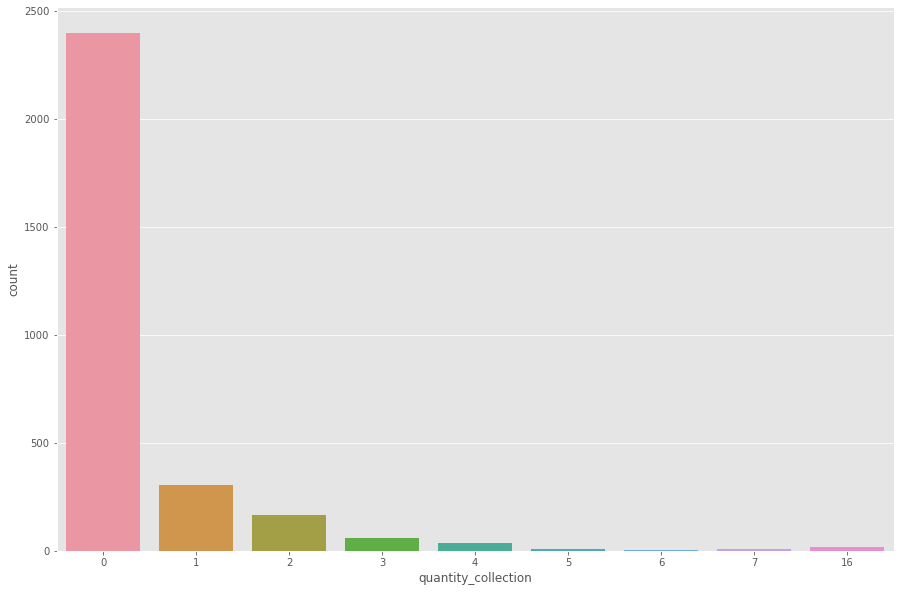

In [268]:
plt.figure(figsize=(15,10))
sns.countplot(x = 'quantity_collection', data = train)

In [269]:
train[['if_collection','quantity_collection']].head(10)

,if_collection,quantity_collection
0,1,1
1,1,2
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,1,2
9,0,0


In [270]:
train.corr()['revenue']

id                     0.000610
budget                 0.752965
popularity             0.461460
runtime                0.216380
revenue                1.000000
if_collection          0.339425
quantity_collection    0.291476
Name: revenue, dtype: float64

In [ ]:
#collection -> sprawdzić razem z latami 

#### Def

In [604]:
def belong_to_collection(df):

    def if_belongs_with_id(df):  
        df['if_collection'] = df['belongs_to_collection'].map(lambda x: 0 if x == 0 else 1)
        df['id_collection'] = df['belongs_to_collection'].apply(lambda x: 0 if x == 0 else x[0]['id'])

    def count_collection(df):
        max = df['id_collection'].value_counts().max()
        count_df = df['id_collection'].value_counts(sort=False).apply(lambda x: 0 if x == max else x)
        count_dic = count_df.to_dict()
        df['quantity_collection'] = df['id_collection'].map(count_dic)
        df.drop(['belongs_to_collection','id_collection'], axis=1, inplace = True)

    extract_from_str(df, 'belongs_to_collection')
    if_belongs_with_id(df)
    count_collection(df)

### Original language

<AxesSubplot:xlabel='original_language', ylabel='count'>

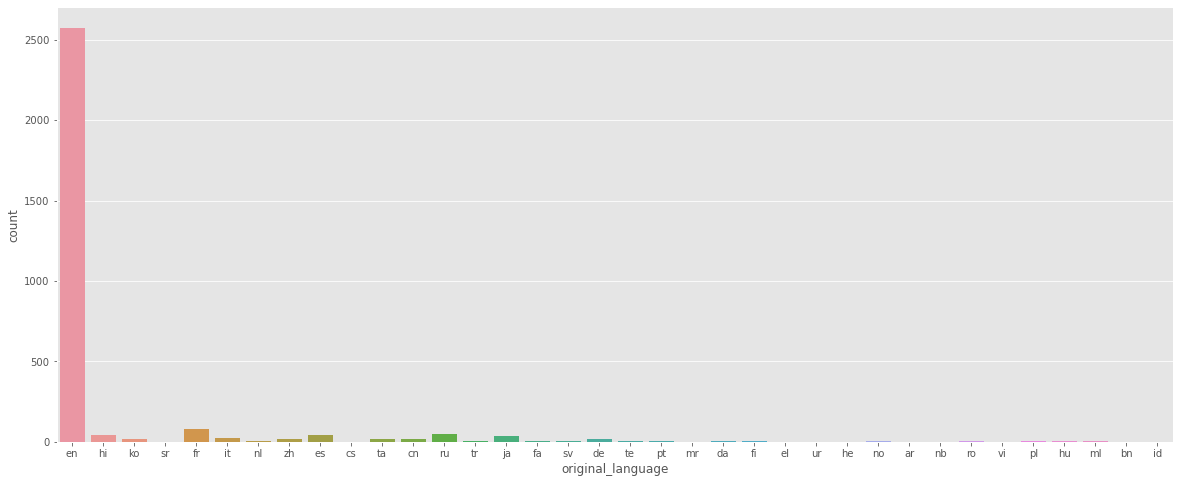

In [307]:
plt.figure(figsize=(20, 8))
sns.countplot(x = 'original_language', data = train)

In [303]:
def if_lang_eng(df):
    df['language_eng'] = df['original_language'].map(lambda x: 1 if x == 'en' else 0)


In [304]:
if_lang_eng(train)

In [323]:
def map_original_lang(df):
    unique_language = df['original_language'].unique()
    nu_lan = np.arange(df['original_language'].nunique())

    dict_language = dict(zip(unique_language, nu_lan))

    df['original_language'] = df['original_language'].map(dict_language)


In [324]:
map_original_lang(train)

In [327]:
train[['language_eng','original_language']].head(10)

,language_eng,original_language
0,1,0
1,1,0
2,1,0
3,0,1
4,0,2
5,1,0
6,1,0
7,1,0
8,1,0
9,1,0


<AxesSubplot:xlabel='language_eng', ylabel='count'>

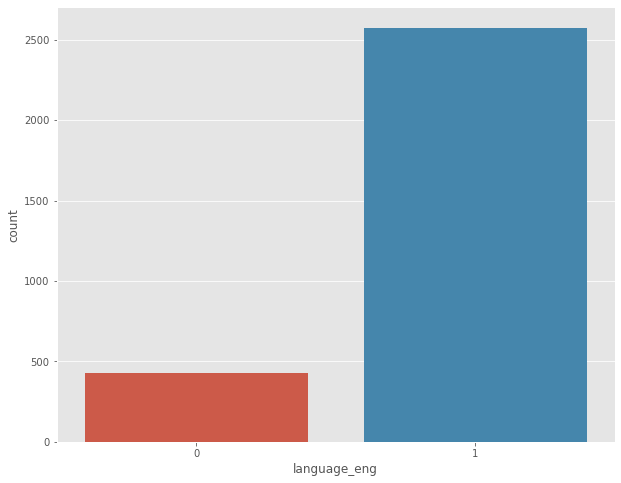

In [328]:
plt.figure(figsize=(10, 8))
sns.countplot(x = 'language_eng', data = train)

#### Def

In [607]:
def original_language(df):
    
    def if_lang_eng(df):
        df['language_eng'] = df['original_language'].map(lambda x: 1 if x == 'en' else 0)

    def map_original_lang(df):
        unique_language = df['original_language'].unique()
        nu_lan = np.arange(df['original_language'].nunique())
        dict_language = dict(zip(unique_language, nu_lan))

        df['original_language'] = df['original_language'].map(dict_language)

    if_lang_eng(df)
    map_original_lang(df)

In [608]:
original_language(train)
original_language(test)

### Original title

In [337]:
train, test = import_data()

In [338]:
train['original_title'].head(10) 

0                      Hot Tub Time Machine 2
1    The Princess Diaries 2: Royal Engagement
2                                    Whiplash
3                                     Kahaani
4                                        마린보이
5      Pinocchio and the Emperor of the Night
6                              The Possession
7                                Control Room
8                      Muppet Treasure Island
9                               A Mighty Wind
Name: original_title, dtype: object

In [342]:
def diff_title(df):
    df['diff_title'] = 0
    for i in range(len(df)):
        if df['title'][i] == df['original_title'][i]:
            df['diff_title'][i] = 1

In [340]:
train['diff_title'] = 0

In [343]:
diff_title(train)

<ipython-input-342-148eef3499db>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff_title'][i] = 1


In [344]:
train['diff_title'].value_counts()

1    2649
0     351
Name: diff_title, dtype: int64

In [346]:
train[['title', 'original_title', 'diff_title']].head(20)

,title,original_title,diff_title
0,Hot Tub Time Machine 2,Hot Tub Time Machine 2,1
1,The Princess Diaries 2: Royal Engagement,The Princess Diaries 2: Royal Engagement,1
2,Whiplash,Whiplash,1
3,Kahaani,Kahaani,1
4,Marine Boy,마린보이,0
5,Pinocchio and the Emperor of the Night,Pinocchio and the Emperor of the Night,1
6,The Possession,The Possession,1
7,Control Room,Control Room,1
8,Muppet Treasure Island,Muppet Treasure Island,1
9,A Mighty Wind,A Mighty Wind,1


#### Def

In [347]:
def title(df):

    def diff_title(df):
        df['diff_title'] = 0
        for i in range(len(df)):
            if df['title'][i] == df['original_title'][i]:
                df['diff_title'][i] = 1

    diff_title(df)
    df.drop(['title','original_title'], axis = 1, inplace = True)

In [361]:
title(train)
title(test)

<ipython-input-342-148eef3499db>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff_title'][i] = 1


### Genres

In [363]:
train, test = import_data()
extract_from_str(train, 'genres')

In [364]:
train['list_genres'] = list(train['genres'].apply(lambda x: [i['name'] for i in x] if x != 0 else []).values)
train[['genres', 'list_genres']].head(10)

,genres,list_genres
0,"[{'id': 35, 'name': 'Comedy'}]",[Comedy]
1,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[Comedy, Drama, Family, Romance]"
2,"[{'id': 18, 'name': 'Drama'}]",[Drama]
3,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...","[Thriller, Drama]"
4,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...","[Action, Thriller]"
5,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...","[Animation, Adventure, Family]"
6,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...","[Horror, Thriller]"
7,"[{'id': 99, 'name': 'Documentary'}]",[Documentary]
8,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...","[Action, Comedy, Music, Family, Adventure]"
9,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...","[Comedy, Music]"


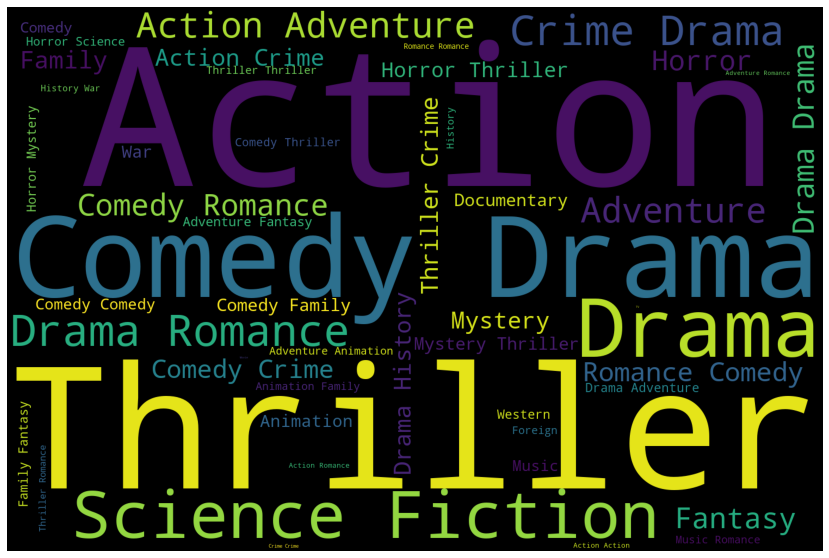

In [365]:
plt.figure(figsize = (15,10))
text = ' '.join([x for i in train['list_genres'] for x in i])
wc = WordCloud(width=1500, height=1000).generate(text)
plt.imshow(wc)
plt.axis("off")
plt.show()

In [366]:
count_type_genres = pd.Series([x for i in train['list_genres'] for x in i]).value_counts()

<AxesSubplot:>

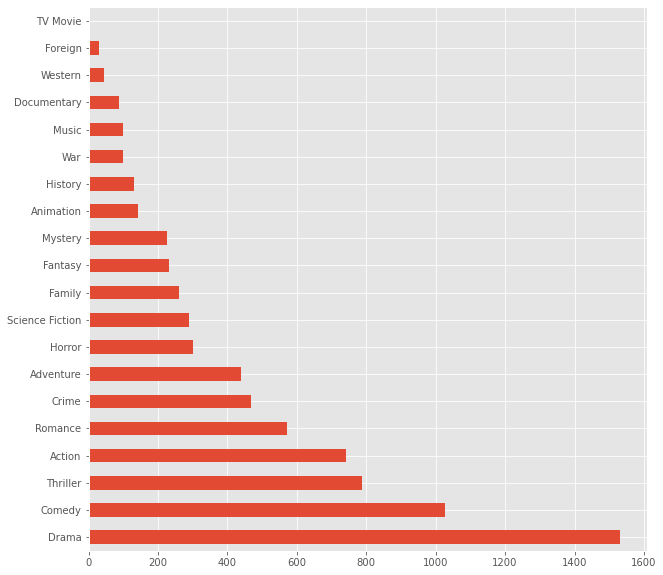

In [367]:
plt.figure(figsize=(10,10))
count_type_genres.plot(kind='barh')

In [368]:
train['count_genres'] = train['list_genres'].apply(lambda x: len(x))
train[['genres', 'list_genres','count_genres']].head(10)

,genres,list_genres,count_genres
0,"[{'id': 35, 'name': 'Comedy'}]",[Comedy],1
1,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[Comedy, Drama, Family, Romance]",4
2,"[{'id': 18, 'name': 'Drama'}]",[Drama],1
3,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...","[Thriller, Drama]",2
4,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...","[Action, Thriller]",2
5,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...","[Animation, Adventure, Family]",3
6,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...","[Horror, Thriller]",2
7,"[{'id': 99, 'name': 'Documentary'}]",[Documentary],1
8,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...","[Action, Comedy, Music, Family, Adventure]",5
9,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...","[Comedy, Music]",2


<AxesSubplot:xlabel='count_genres', ylabel='count'>

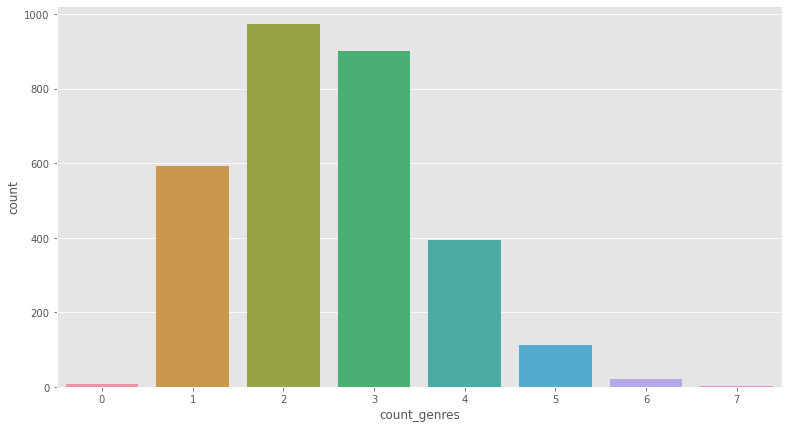

In [369]:
plt.figure(figsize=(13,7))
sns.countplot(x = 'count_genres', data = train)

#### Def

In [370]:
def genres(df):
    extract_from_str(df, 'genres')
    df['list_genres'] = list(df['genres'].apply(lambda x: [i['name'] for i in x] if x != 0 else []).values)
    df['count_genres'] = df['list_genres'].apply(lambda x: len(x))
    df.drop(['genres', 'list_genres'], axis = 1, inplace = True)

In [376]:
genres(train)
genres(test)

### Budget

In [377]:
train, test = import_data()

In [378]:
train['budget'].head()

0    14000000
1    40000000
2     3300000
3     1200000
4           0
Name: budget, dtype: int64

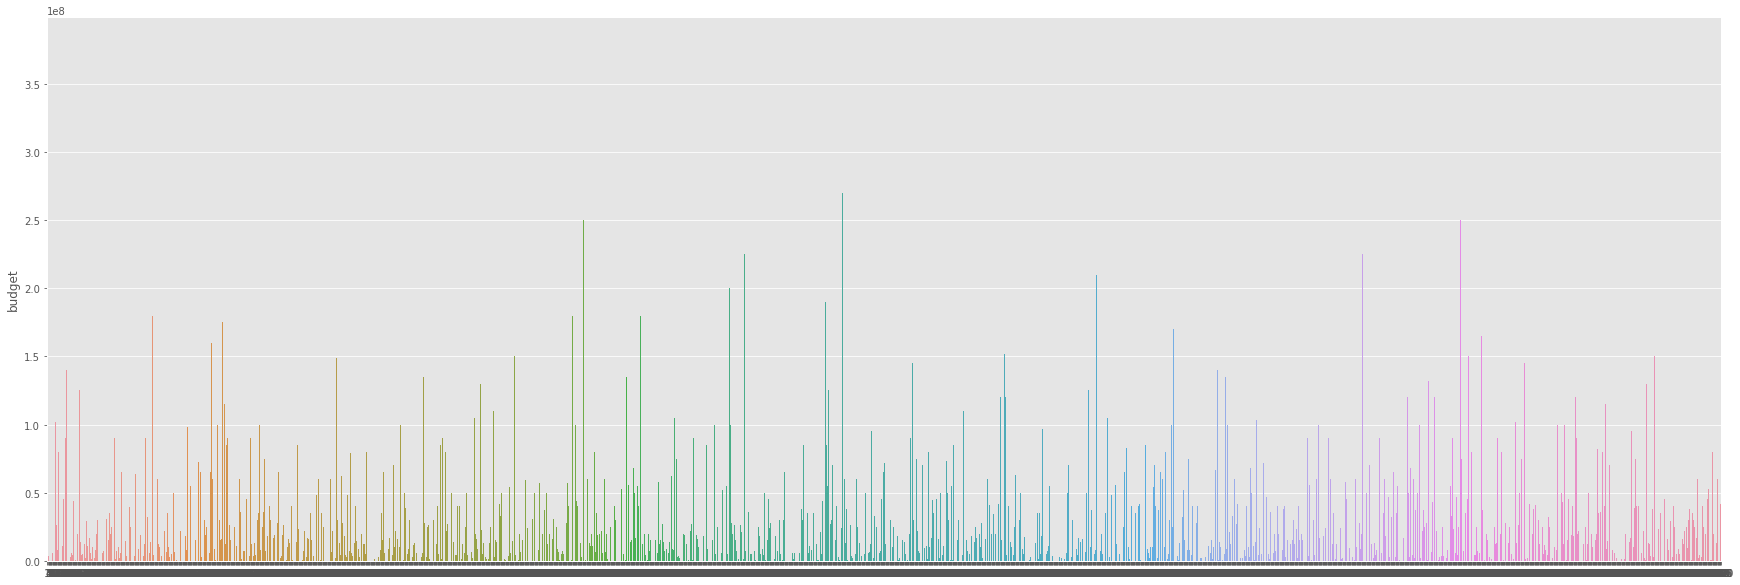

In [16]:
plt.figure(figsize=(30,10))
ax = sns.barplot(x = 'id', y = 'budget', data = train)
ax.set(xlabel=None)
plt.show()

<AxesSubplot:xlabel='budget', ylabel='revenue'>

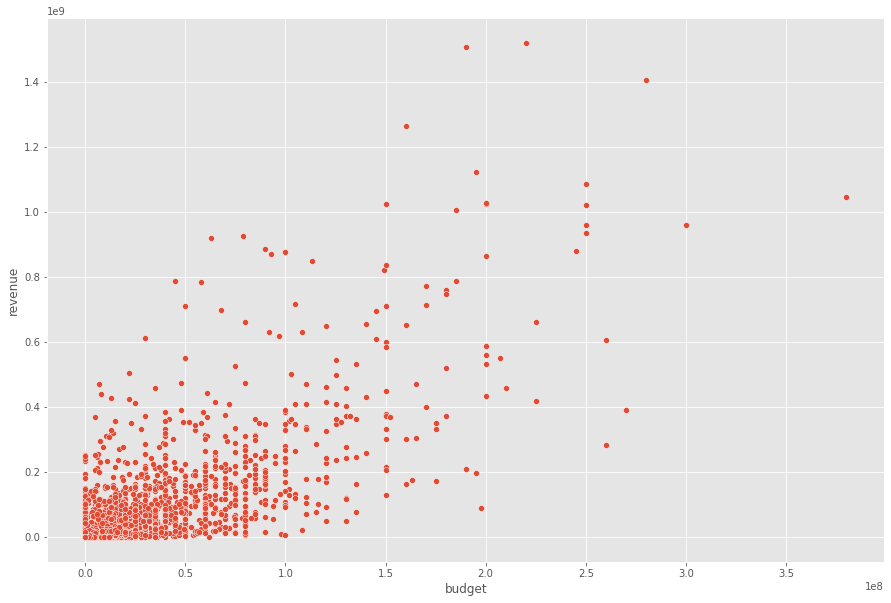

In [56]:
plt.figure(figsize=(15,10))
sns.scatterplot(x = 'budget', y ='revenue', data = train)

In [17]:
train['budget'].describe()

count    3.000000e+03
mean     2.253133e+07
std      3.702609e+07
min      0.000000e+00
25%      0.000000e+00
50%      8.000000e+06
75%      2.900000e+07
max      3.800000e+08
Name: budget, dtype: float64

### Homepage

In [380]:
train, test = import_data()

In [381]:
train['homepage'].head(10)

0                                   NaN
1                                   NaN
2     http://sonyclassics.com/whiplash/
3            http://kahaanithefilm.com/
4                                   NaN
5                                   NaN
6    http://www.thepossessionmovie.com/
7                                   NaN
8                                   NaN
9                                   NaN
Name: homepage, dtype: object

In [382]:
print("All:", len(train))
print("Null:", train['homepage'].isnull().sum())

All: 3000
Null: 2054


In [383]:
train['homepage'].fillna(0, axis = 0, inplace=True)
train['homepage'] = train['homepage'].apply(lambda x: 0 if x == 0 else 1)

#### Def

In [385]:
def homepage(df):
    df['homepage'].fillna(0, axis = 0, inplace=True)
    df['homepage'] = df['homepage'].apply(lambda x: 0 if x == 0 else 1)

In [386]:
homepage(train)
homepage(test)

### Overview

In [387]:
train, test = import_data()

In [388]:
train['overview'].head()

0    When Lou, who has become the "father of the In...
1    Mia Thermopolis is now a college graduate and ...
2    Under the direction of a ruthless instructor, ...
3    Vidya Bagchi (Vidya Balan) arrives in Kolkata ...
4    Marine Boy is the story of a former national s...
Name: overview, dtype: object

In [389]:
train['overview'].isnull().sum()

8

In [390]:
train['revenue'].describe()

count    3.000000e+03
mean     6.672585e+07
std      1.375323e+08
min      1.000000e+00
25%      2.379808e+06
50%      1.680707e+07
75%      6.891920e+07
max      1.519558e+09
Name: revenue, dtype: float64

In [391]:
len(train['overview'][0])

155

In [392]:
train['overview'].fillna("", axis = 0, inplace = True)
train['len_overview'] = train['overview'].apply(len)

In [393]:
train[['overview', 'len_overview']].head()

,overview,len_overview
0,"When Lou, who has become the ""father of the In...",155
1,Mia Thermopolis is now a college graduate and ...,393
2,"Under the direction of a ruthless instructor, ...",130
3,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,581
4,Marine Boy is the story of a former national s...,168


<AxesSubplot:xlabel='len_overview', ylabel='revenue'>

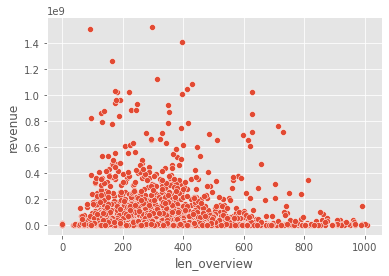

In [394]:
sns.scatterplot(x = 'len_overview', y = 'revenue', data = train)

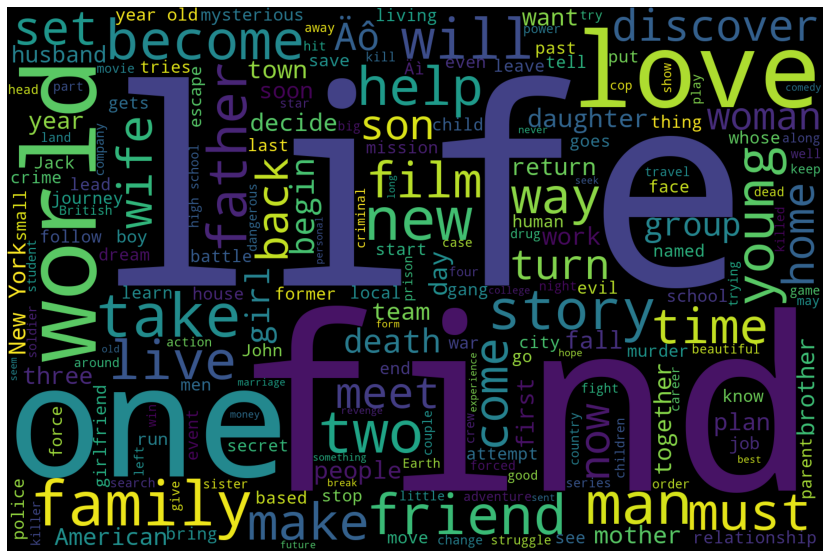

In [395]:
plt.figure(figsize = (15,10))
text = ''.join([x for i in train['overview'].fillna('') for x in i])
wc = WordCloud(width=1500, height=1000).generate(text)
plt.imshow(wc)
plt.axis("off")
plt.show()

In [396]:
print(wc.words_.keys())

dict_keys(['life', 'find', 'one', 'love', 'world', 'family', 'take', 'new', 'man', 'two', 'story', 'will', 'become', 'friend', 'father', 'live', 'young', 'help', 'must', 'make', 'way', 'time', 'film', 'set', 'come', 'wife', 'discover', 'meet', 'back', 'home', 'now', 'turn', 'son', 'woman', 'Äô', 'group', 'death', 'girl', 'begin', 'daughter', 'town', 'day', 'fall', 'team', 'decide', 'mother', 'work', 'people', 'American', 'first', 'three', 'year', 'want', 'brother', 'return', 'together', 'plan', 'New York', 'husband', 'soon', 'mysterious', 'job', 'save', 'run', 'year old', 'boy', 'relationship', 'past', 'start', 'lead', 'murder', 'face', 'city', 'goes', 'dream', 'secret', 'named', 'thing', 'tries', 'school', 'former', 'war', 'tell', 'gets', 'know', 'follow', 'end', 'Jack', 'Äì', 'whose', 'attempt', 'go', 'local', 'journey', 'stop', 'human', 'evil', 'John', 'living', 'mission', 'police', 'escape', 'force', 'even', 'crime', 'based', 'learn', 'see', 'men', 'last', 'house', 'move', 'small',

### Def

In [397]:
# tu chyba nic się nie wyciągnie, pomyślec jeszcez

### Popularity

In [398]:
train, test = import_data()

<AxesSubplot:ylabel='Frequency'>

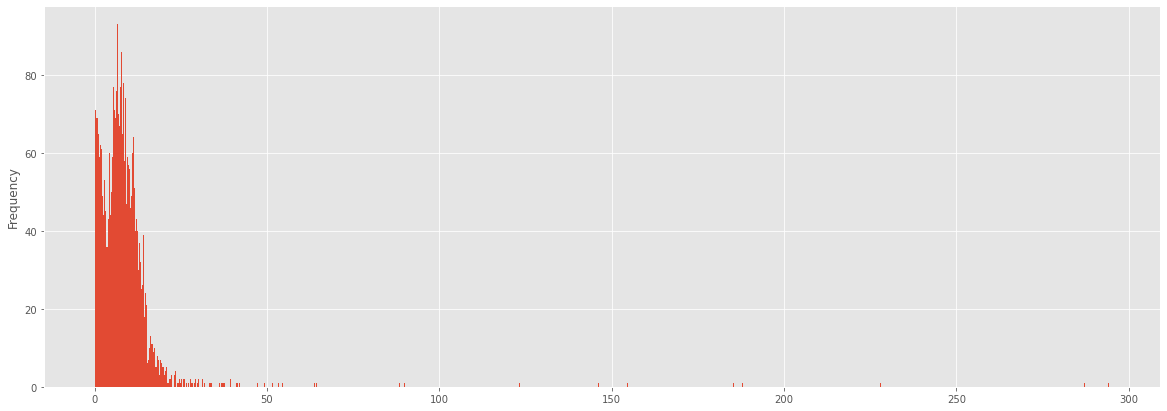

In [399]:
plt.figure(figsize=(20,7))
train['popularity'].plot(kind = 'hist', bins = 1000)

<AxesSubplot:xlabel='popularity', ylabel='revenue'>

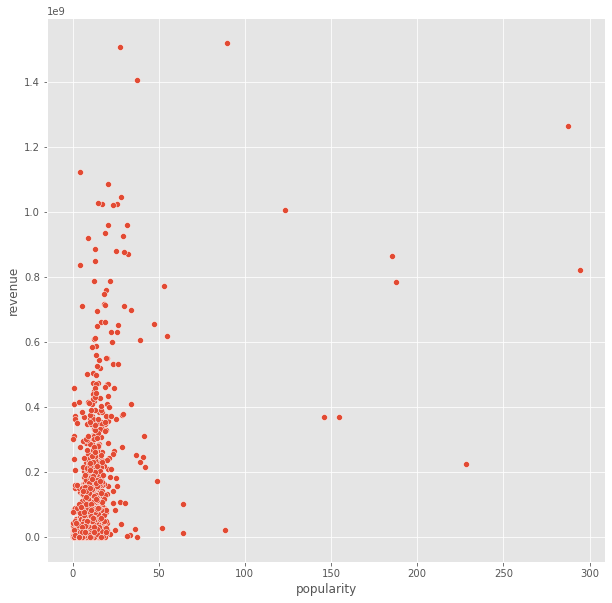

In [400]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'popularity', y = 'revenue', data = train)

### Posterpath

In [93]:
train['poster_path'].head(10)

0    /tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg
1    /w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg
2    /lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg
3    /aTXRaPrWSinhcmCrcfJK17urp3F.jpg
4    /m22s7zvkVFDU9ir56PiiqIEWFdT.jpg
5    /6IDqA1D2NBIVhzEEaMMRL28iBrq.jpg
6    /4QjzFuaZmB4btGnLwAgdp23BzIU.jpg
7    /83BV8fGy5p9i8RwE9oj76tZ1Ikp.jpg
8    /5A8gKzOrF9Z7tSUX6xd5dEx4NXf.jpg
9    /xwD4EsPOGLuKP50Q1gwqAsyhAFB.jpg
Name: poster_path, dtype: object

In [94]:
train['poster_path'].isnull().sum()

1

### Production companies

In [12]:
train, test = import_data()

In [14]:
null('production_companies')

Train Null: 0
Test Null: 258


In [13]:
extract_from_str(train, 'production_companies')

In [15]:
train['production_companies'].head(10)

0    [{'name': 'Paramount Pictures', 'id': 4}, {'na...
1          [{'name': 'Walt Disney Pictures', 'id': 2}]
2    [{'name': 'Bold Films', 'id': 2266}, {'name': ...
3                                                    0
4                                                    0
5                                                    0
6    [{'name': 'Ghost House Pictures', 'id': 768}, ...
7                                                    0
8    [{'name': 'Walt Disney Pictures', 'id': 2}, {'...
9    [{'name': 'Castle Rock Entertainment', 'id': 97}]
Name: production_companies, dtype: object

In [16]:
train['list_production_companies'] = list(train['production_companies'].apply(lambda x: [i['name'] for i in x] if x != 0 else []).values)
train[['production_companies', 'list_production_companies']].head(10)

,production_companies,list_production_companies
0,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[Paramount Pictures, United Artists, Metro-Gol..."
1,"[{'name': 'Walt Disney Pictures', 'id': 2}]",[Walt Disney Pictures]
2,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[Bold Films, Blumhouse Productions, Right of W..."
3,0,[]
4,0,[]
5,0,[]
6,"[{'name': 'Ghost House Pictures', 'id': 768}, ...","[Ghost House Pictures, North Box Productions]"
7,0,[]
8,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[Walt Disney Pictures, Jim Henson Productions,..."
9,"[{'name': 'Castle Rock Entertainment', 'id': 97}]",[Castle Rock Entertainment]


In [434]:
train['main_production_companies'] = train['list_production_companies'].apply(lambda x: x[0] if x != [] else 'no_info')

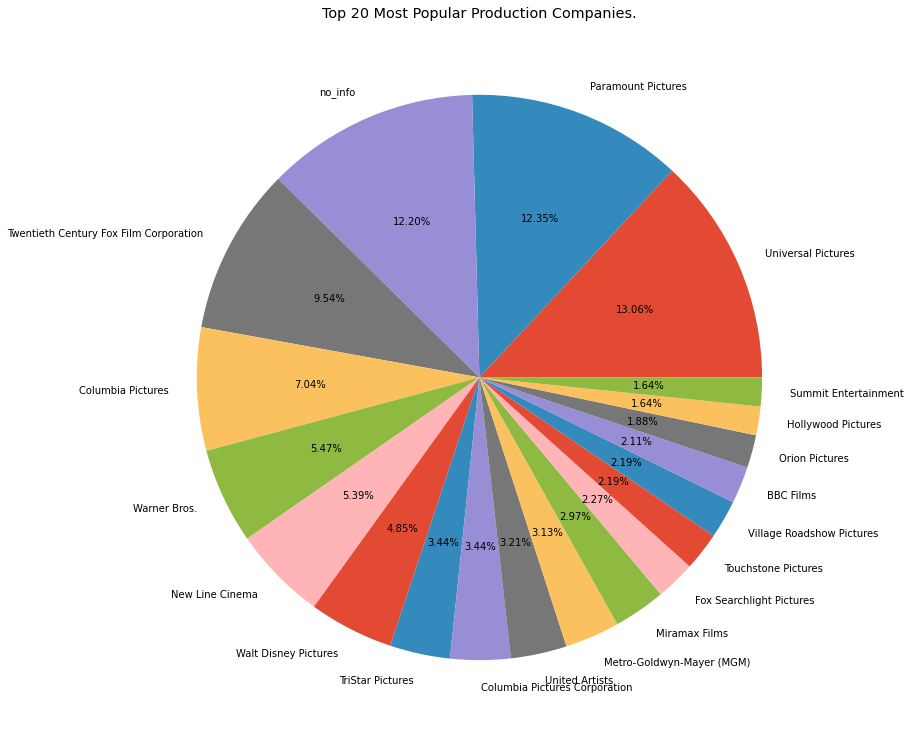

In [435]:
main_comp = train['main_production_companies'].value_counts().head(20)

plt.figure(figsize=(13,13))
plt.pie(main_comp.values, labels=main_comp.index, autopct='%.2f%%') 
plt.title('Top 20 Most Popular Production Companies.')
plt.show()

In [21]:
train['len_production_companies'] = train['list_production_companies'].apply(len)
train['id_production_comapnies'] = list(train['production_companies'].apply(lambda x: [i['id'] for i in x] if x != 0 else []).values)
train['main_production_companies_id'] = train['id_production_comapnies'].apply(lambda x: x[0] if x != [] else 0)

In [439]:
train.drop(['list_production_companies', 'main_production_companies', 'production_companies'], axis = 1, inplace = True)

#### Def

In [23]:
def production_companies(df):
    extract_from_str(df, 'production_companies')
    df['list_production_companies'] = list(df['production_companies'].apply(lambda x: [i['name'] for i in x] if x != 0 else []).values)
    df['len_production_companies'] = df['list_production_companies'].apply(len)
    df['id_production_comapnies'] = list(df['production_companies'].apply(lambda x: [i['id'] for i in x] if x != 0 else []).values)
    df['main_production_companies_id'] = df['id_production_comapnies'].apply(lambda x: x[0] if x != [] else 0)
    df.drop(['list_production_companies', 'production_companies', 'id_production_comapnies'], axis = 1, inplace = True)

In [443]:
production_companies(train)
production_companies(test)

### Production countries

In [445]:
train, test = import_data()

In [446]:
train['production_countries'][0]

"[{'iso_3166_1': 'US', 'name': 'United States of America'}]"

In [447]:
extract_from_str(train, 'production_countries')

In [448]:
train['list_production_countries'] = list(train['production_countries'].apply(lambda x: [i['name'] for i in x] if x != 0 else []).values)
train[['production_countries', 'list_production_countries']].head(10)

,production_countries,list_production_countries
0,"[{'iso_3166_1': 'US', 'name': 'United States o...",[United States of America]
1,"[{'iso_3166_1': 'US', 'name': 'United States o...",[United States of America]
2,"[{'iso_3166_1': 'US', 'name': 'United States o...",[United States of America]
3,"[{'iso_3166_1': 'IN', 'name': 'India'}]",[India]
4,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",[South Korea]
5,0,[]
6,"[{'iso_3166_1': 'US', 'name': 'United States o...","[United States of America, Canada]"
7,0,[]
8,"[{'iso_3166_1': 'US', 'name': 'United States o...",[United States of America]
9,"[{'iso_3166_1': 'US', 'name': 'United States o...",[United States of America]


In [449]:
train['list_production_countries'].apply(len).sort_values(ascending=False).head(10)

71      8
1331    6
1338    6
2314    6
777     5
1127    5
2244    5
1775    5
710     5
2237    5
Name: list_production_countries, dtype: int64

In [451]:
train['len_production_countries'] = train['list_production_countries'].apply(len)

/home/adamz/anaconda3/envs/ML/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Len production countries vs revenue')

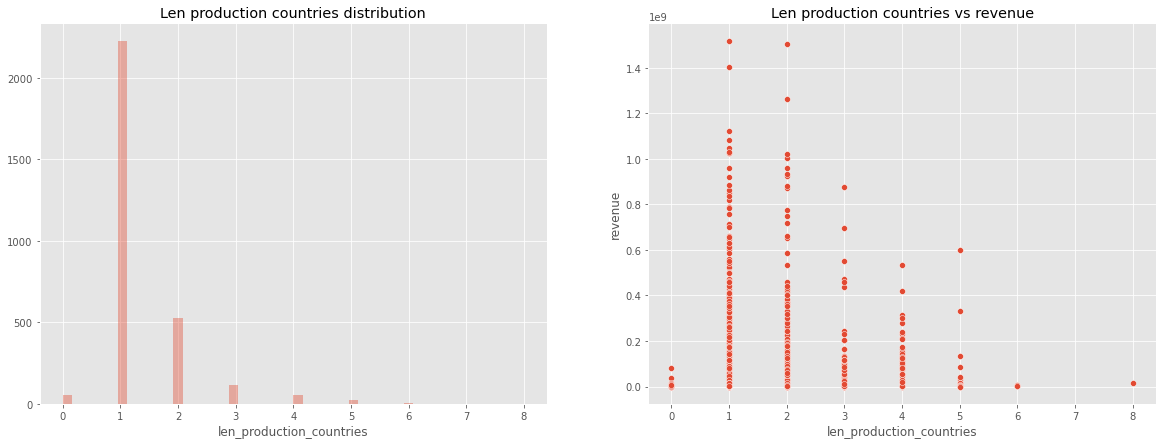

In [285]:
plt.figure(figsize=(20,7))
plt.subplot(1, 2, 1)
f1 = sns.distplot(train['len_production_countries'], kde = False)
f1.set_title('Len production countries distribution')
plt.subplot(1, 2, 2)
f2 = sns.scatterplot(x = 'len_production_countries', y = 'revenue', data = train)
f2.set_title('Len production countries vs revenue')

In [286]:
train['list_production_countries']

0       [United States of America]
1       [United States of America]
2       [United States of America]
3                          [India]
4                    [South Korea]
                   ...            
2995    [United States of America]
2996             [Denmark, Sweden]
2997    [United States of America]
2998    [United States of America]
2999    [United States of America]
Name: list_production_countries, Length: 3000, dtype: object

In [287]:
count_production_countries = pd.Series([x for i in train['list_production_countries'] for x in i]).value_counts()

<AxesSubplot:>

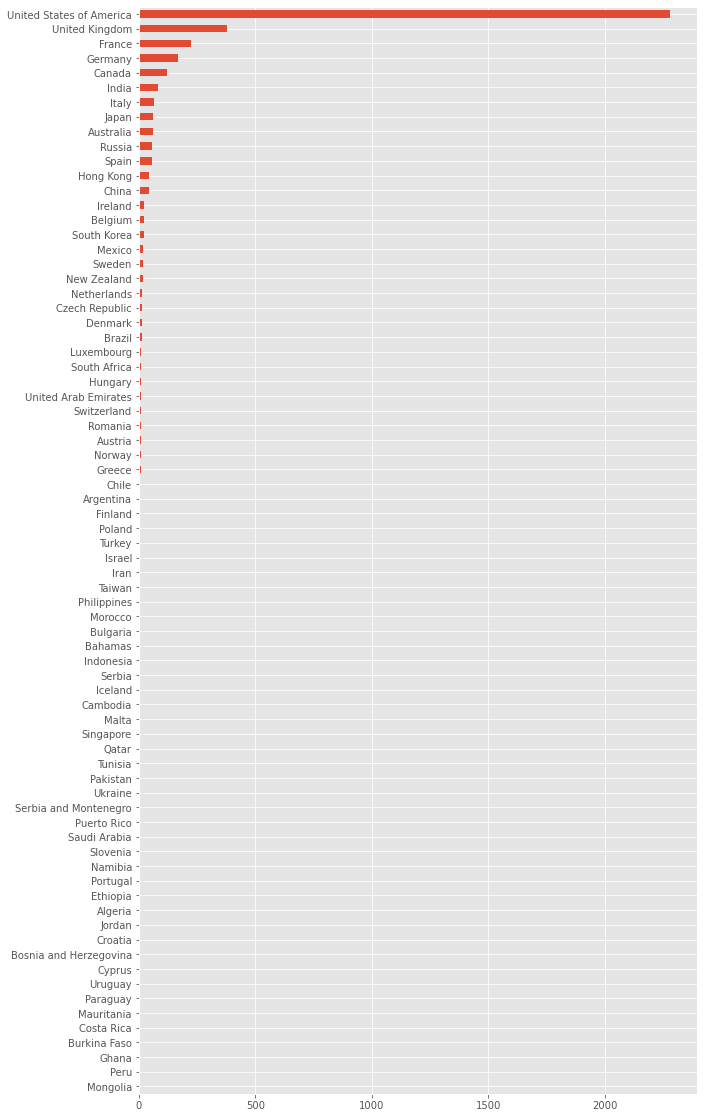

In [288]:
plt.figure(figsize=(10,20))
count_production_countries.sort_values(ascending=True).plot(kind = 'barh')

In [294]:
train['if_in_USA'] = train['list_production_countries'].apply(lambda x: 1 if 'United States of America' in x else 0)

/home/adamz/anaconda3/envs/ML/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'If production in USA vs revenue')

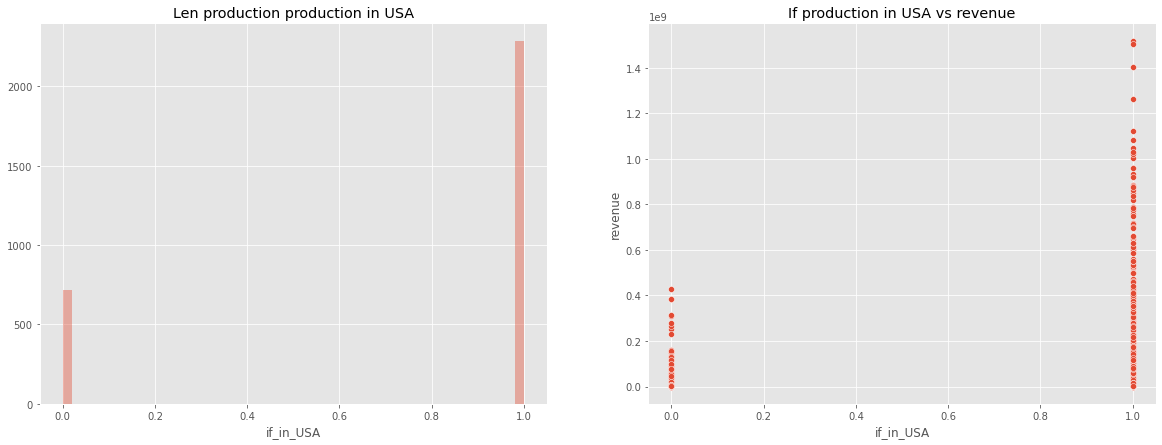

In [299]:
plt.figure(figsize=(20,7))
plt.subplot(1, 2, 1)
f1 = sns.distplot(train['if_in_USA'], kde = False)
f1.set_title('Len production production in USA')
plt.subplot(1, 2, 2)
f2 = sns.scatterplot(x = 'if_in_USA', y = 'revenue', data = train)
f2.set_title('If production in USA vs revenue')


In [453]:
train.drop(['list_production_countries', 'production_countries'], axis = 1, inplace = True)

#### Def

In [457]:
def production_countries(df):
    extract_from_str(df, 'production_countries')
    df['list_production_countries'] = list(df['production_countries'].apply(lambda x: [i['name'] for i in x] if x != 0 else []).values)
    df['len_production_countries'] = df['list_production_countries'].apply(len)
    df['if_in_USA'] = df['list_production_countries'].apply(lambda x: 1 if 'United States of America' in x else 0)
    df.drop(['list_production_countries', 'production_countries'], axis = 1, inplace = True)

In [460]:
production_countries(train)
production_countries(test)

### Relase date

In [60]:
train, test = import_data()

In [61]:
test[test['release_date'].isnull() == True]['release_date']

828    NaN
Name: release_date, dtype: object

In [57]:
id = test[test['release_date'].isnull() == True].index.values
test.__getitem__('release_date').loc.__setitem__(id, '3/20/01') #source - IMDB

In [575]:
train['release_date'].head(10)

0     2/20/15
1      8/6/04
2    10/10/14
3      3/9/12
4      2/5/09
5      8/6/87
6     8/30/12
7     1/15/04
8     2/16/96
9     4/16/03
Name: release_date, dtype: object

In [576]:
train['day'] = train['release_date'].apply(lambda x: int(x.split('/')[1]))
train['month'] = train['release_date'].apply(lambda x: int(x.split('/')[0]))
train['year'] = train['release_date'].apply(lambda x: int(x.split('/')[2]))

In [577]:
train[train['year'] > 17]['year'].sort_values().head(10)

1763    21
2992    24
1917    25
1361    25
2680    26
1161    27
2946    27
2577    28
1760    28
187     28
Name: year, dtype: int64

In [578]:
def add_full_year(x):
    if x > 17:
        x += 1900
    else:
        x += 2000
    return x

In [579]:
train['year'] = train['year'].apply(lambda x: add_full_year(x))
train['release_date'] = pd.to_datetime(train[['year','month','day']])
train[['release_date', 'year', 'month', 'day']].head(10)

,release_date,year,month,day
0,2015-02-20,2015,2,20
1,2004-08-06,2004,8,6
2,2014-10-10,2014,10,10
3,2012-03-09,2012,3,9
4,2009-02-05,2009,2,5
5,1987-08-06,1987,8,6
6,2012-08-30,2012,8,30
7,2004-01-15,2004,1,15
8,1996-02-16,1996,2,16
9,2003-04-16,2003,4,16


In [580]:
full_revenue_per_year = train.groupby('year').sum()['revenue']
count_per_year = train['year'].value_counts(ascending=True)
revenue_one_film_per_year = full_revenue_per_year/count_per_year

per_year = pd.DataFrame({'full_revenue_per_year' : full_revenue_per_year, 
            'count_per_year' : count_per_year,
            'revenue_one_film_per_year': revenue_one_film_per_year})

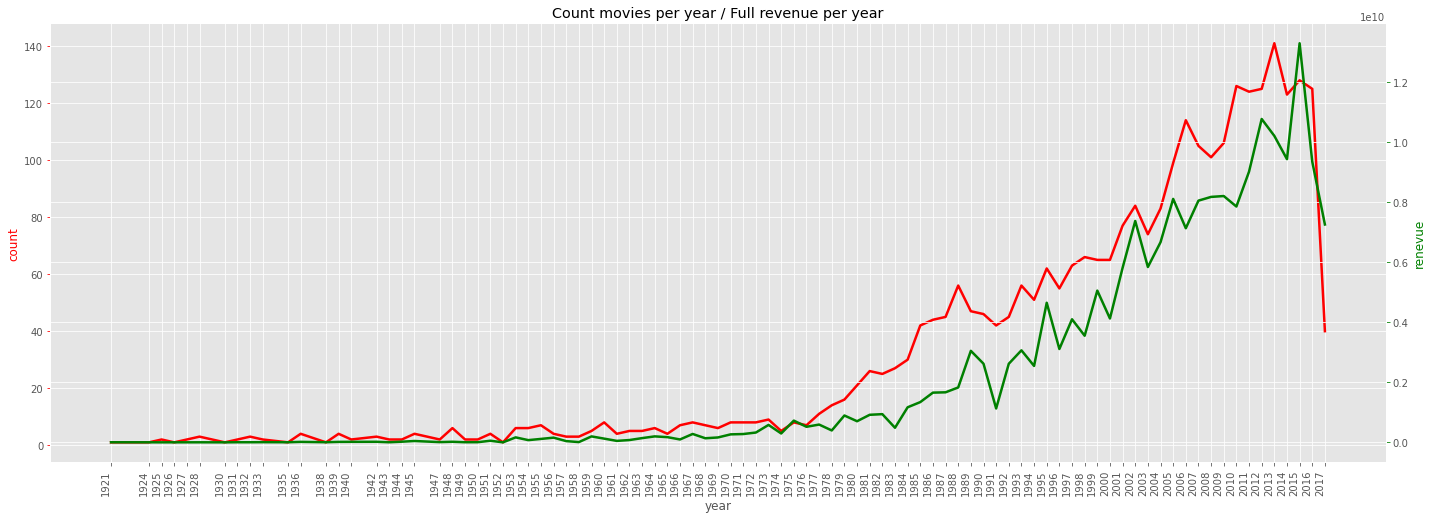

In [581]:
f, ax1 = plt.subplots(figsize=(20,8))

ax1.set_xlabel('year')
ax1.set_ylabel('count', color = 'r')
ax1.plot(per_year['count_per_year'], color = 'r', linewidth = 2.5)
ax1.tick_params(axis='y', color = 'r')

ax2 = ax1.twinx()

ax2.set_xlabel('year')
ax2.set_ylabel('renevue', color = 'g')
ax2.plot(per_year['full_revenue_per_year'], color = 'g', linewidth = 2.5)
ax2.tick_params(axis='y', color = 'g')

f.tight_layout()
f.autofmt_xdate(rotation=90)
plt.title('Count movies per year / Full revenue per year')
plt.xticks(per_year.index)
plt.show()

Text(0.5, 1.0, 'revenue_one_film_per_year')

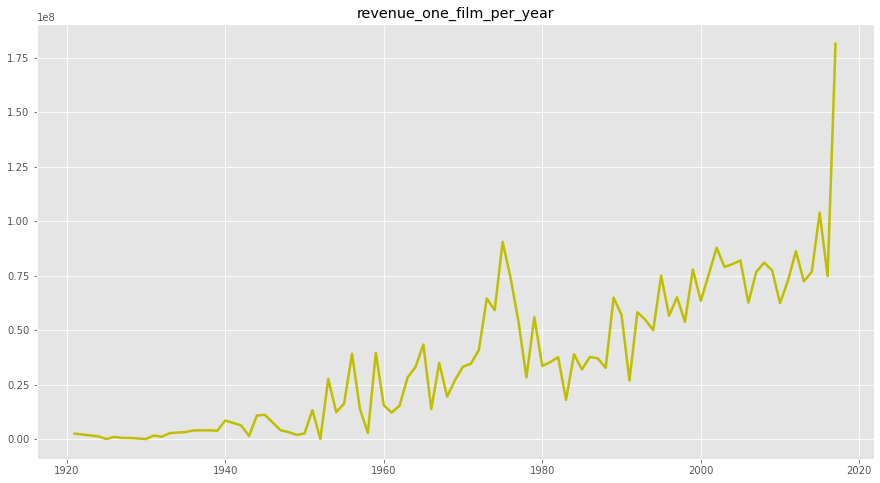

In [17]:
plt.figure(figsize=(15, 8))
f3 = per_year['revenue_one_film_per_year'].plot(color = 'y', linewidth = 2.5, )
f3.set_title('revenue_one_film_per_year')

<AxesSubplot:xlabel='year', ylabel='revenue'>

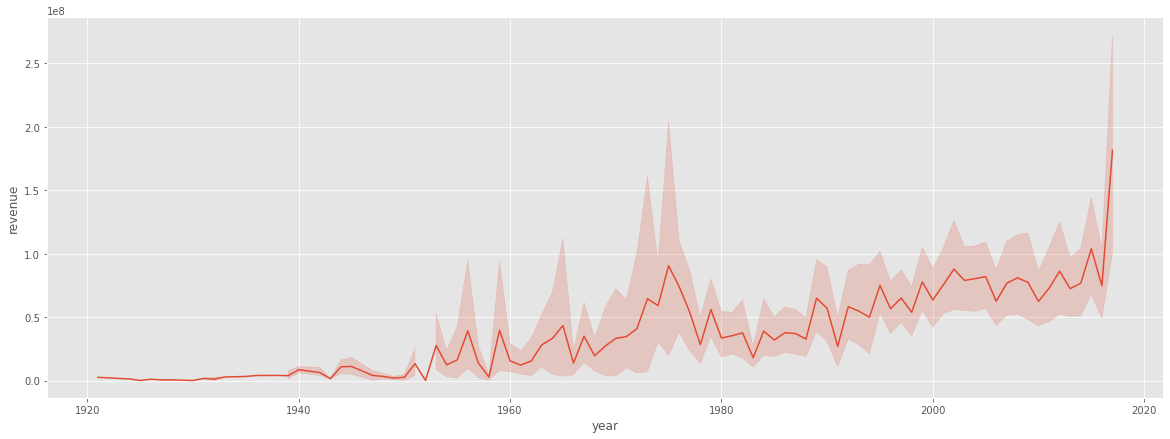

In [18]:
plt.figure(figsize=(20,7))
sns.lineplot(x = 'year', y = 'revenue', data = train)    

In [19]:
corr_rev(train)

id            0.000610
budget        0.752965
popularity    0.461460
runtime       0.216380
revenue       1.000000
day           0.045699
month         0.020164
year          0.137933
Name: revenue, dtype: float64


#### Def

In [601]:
def release_date(df):

    def add_full_year(x):
        if x > 17:
            x += 1900
        else:
            x += 2000
        return x

    if len(df) == 4398:
        id = df[df['release_date'].isnull() == True].index.values
        df.__getitem__('release_date').loc.__setitem__(id, '3/20/01') #source - IMDB

    df['day'] = df['release_date'].apply(lambda x: int(x.split('/')[1]))
    df['month'] = df['release_date'].apply(lambda x: int(x.split('/')[0]))
    df['year'] = df['release_date'].apply(lambda x: int(x.split('/')[2]))

    df['year'] = df['year'].apply(lambda x: add_full_year(x))
    #df['release_date'] = pd.to_datetime(df[['year','month','day']])
    df.drop(['release_date'], axis = 1, inplace = True)


In [603]:
release_date(train)
release_date(test)

### Runtime

In [20]:
train, test = import_data()

In [12]:
null('runtime')

Train Null: 2
Test Null: 4


In [13]:
train[train['runtime'].isnull() == True]

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
1335,1336,NaN,6000000,"[{'id': 18, 'name': 'Drama'}]",NaN,tt1107828,ru,Королёв,NaN,0.292296,...,10/29/07,NaN,NaN,Released,NaN,Королёв,NaN,"[{'cast_id': 3, 'character': '–°–µ—Ä–≥–µ–π –ö–...","[{'credit_id': '52fe4db29251416c7513d819', 'de...",31000
2302,2303,NaN,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt0116485,de,Happy Weekend,NaN,0.002229,...,3/14/96,NaN,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",Released,NaN,Happy Weekend,"[{'id': 572, 'name': 'sex'}, {'id': 596, 'name...","[{'cast_id': 0, 'character': 'Joachim Krippo',...",NaN,65335


In [46]:
test[test['runtime'].apply(lambda x: isinstance(x, str))]['runtime']

828    3/20/01
Name: runtime, dtype: object

In [21]:
mean_rt = train['runtime'].mean()
train['runtime'].fillna(mean_rt, inplace = True)

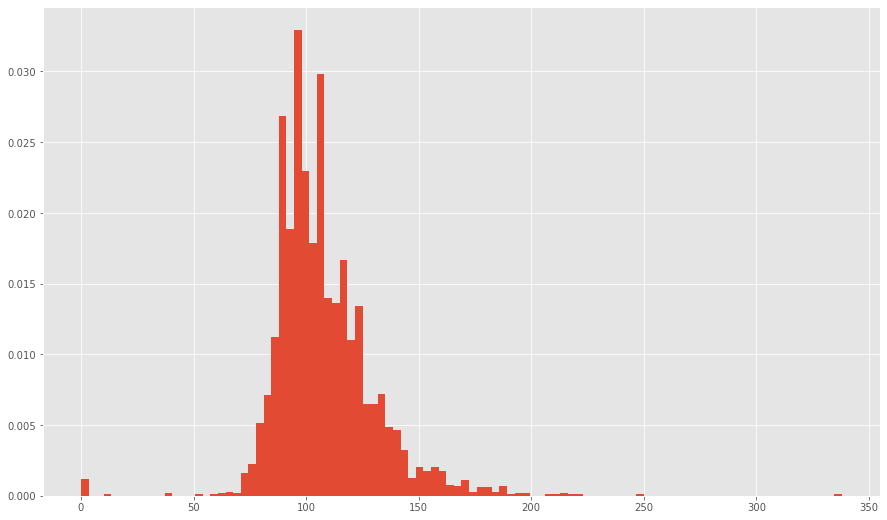

In [7]:
plt.figure(figsize=(15,9))
plt.hist(train['runtime'], bins = 100, density = True)
plt.show()

In [22]:
train['runtime'].sort_values(ascending=True)

2785      0.0
2865      0.0
2645      0.0
591       0.0
390       0.0
        ...  
1914    214.0
1302    219.0
523     220.0
1922    248.0
1211    338.0
Name: runtime, Length: 3000, dtype: float64

In [23]:
train[train['runtime'] == 0]['title'] # po sprawdzeniu onie nie trwają 0 więc uznawane sa jako null

390           The Worst Christmas of My Life
591                  А поутру они проснулись
924                     ¿Quién mató a Bambi?
977      La peggior settimana della mia vita
1255                             Cry, Onion!
1541                             All at Once
1874                                 Missing
2150                             Mechenosets
2498    Hooked on the Game 2. The Next Level
2645                        My Old Classmate
2785                              Revelation
2865               Tutto tutto niente niente
Name: title, dtype: object

In [24]:
train['runtime'] = train['runtime'].apply(lambda x: mean_rt if x == 0 else x)

<AxesSubplot:xlabel='revenue', ylabel='runtime'>

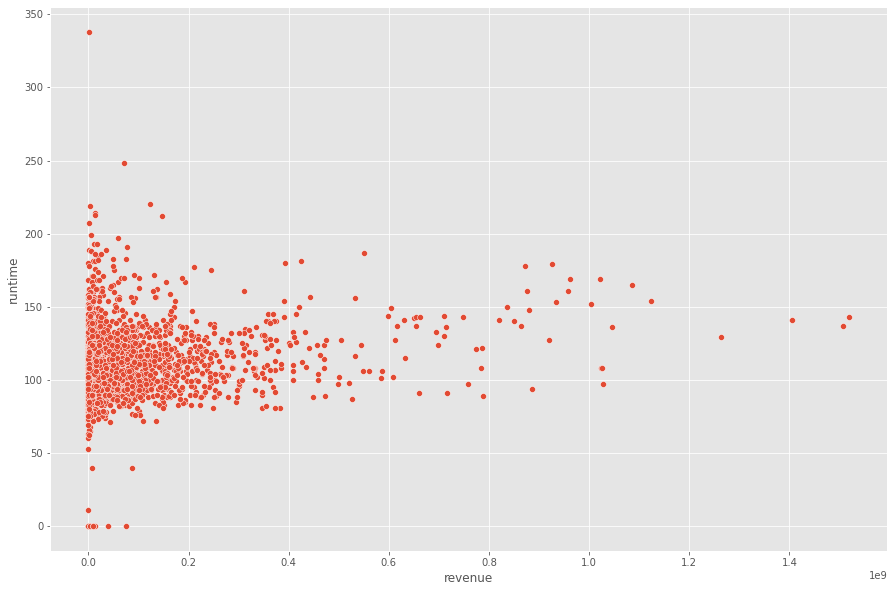

In [24]:
plt.figure(figsize=(15,10))
sns.scatterplot(x = 'revenue', y = 'runtime', data = train)

In [ ]:
corr_rev(train)

#### Def

In [25]:
def runtime(df):
    mean_rt = df['runtime'].mean()
    df['runtime'].fillna(mean_rt, inplace = True)
    df['runtime'] = df['runtime'].apply(lambda x: mean_rt if x == 0 else x)

In [26]:
runtime(train)
runtime(test)

### Spoken language

In [623]:
train, test = import_data()

In [624]:
null('spoken_languages')

Train Null: 20
Test Null: 42


In [625]:
train['spoken_languages'].head()

0             [{'iso_639_1': 'en', 'name': 'English'}]
1             [{'iso_639_1': 'en', 'name': 'English'}]
2             [{'iso_639_1': 'en', 'name': 'English'}]
3    [{'iso_639_1': 'en', 'name': 'English'}, {'iso...
4             [{'iso_639_1': 'ko', 'name': '한국어/조선말'}]
Name: spoken_languages, dtype: object

In [626]:
extract_from_str(train, 'spoken_languages')

In [627]:
train['list_spoken_languages'] = list(train['spoken_languages'].apply(lambda x: [i['iso_639_1'] for i in x] if x != 0 else []).values)
train['len_spoken_lan'] = train['list_spoken_languages'].apply(lambda x: len(x))
train['eng_spoken_lan'] = train['list_spoken_languages'].apply(lambda x: 1 if 'en' in x else 0)
train[['spoken_languages', 'list_spoken_languages', 'eng_spoken_lan', 'len_spoken_lan']].head(10)

,spoken_languages,list_spoken_languages,eng_spoken_lan,len_spoken_lan
0,"[{'iso_639_1': 'en', 'name': 'English'}]",[en],1,1
1,"[{'iso_639_1': 'en', 'name': 'English'}]",[en],1,1
2,"[{'iso_639_1': 'en', 'name': 'English'}]",[en],1,1
3,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...","[en, hi]",1,2
4,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",[ko],0,1
5,"[{'iso_639_1': 'en', 'name': 'English'}]",[en],1,1
6,"[{'iso_639_1': 'en', 'name': 'English'}]",[en],1,1
7,"[{'iso_639_1': 'ar', 'name': 'العربية'}, {'iso...","[ar, en]",1,2
8,"[{'iso_639_1': 'en', 'name': 'English'}]",[en],1,1
9,"[{'iso_639_1': 'en', 'name': 'English'}]",[en],1,1


<AxesSubplot:xlabel='len_spoken_lan', ylabel='count'>

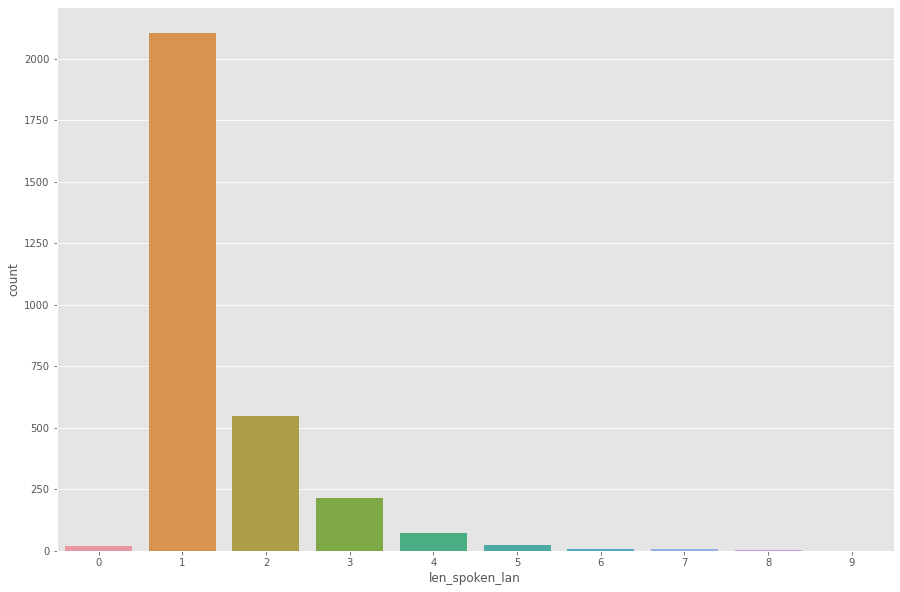

In [63]:
plt.figure(figsize=(15,10))
sns.countplot(x = 'len_spoken_lan', data = train)

In [64]:
train[train['len_spoken_lan'] == 0]['title'] #0 - no info

150                                          Windwalker
177                                         Boys Life 2
454                                  Sweet Hearts Dance
470     The Book of Mormon Movie, Volume 1: The Journey
979                                            Russkies
1101                                         Crazy Love
1333                          One Bright Shining Moment
1335                                            Королёв
1483                                 The Wedding Ringer
1503                                         Campus Man
1537                                        Planet Hulk
1622                                            Jackpot
1648                                            Squeeze
1760                                Across to Singapore
1917                                    The Merry Widow
1923                                               OPA!
2427                                             Joshua
2629           Homeward Bound II: Lost in San Fr

In [65]:
train['eng_spoken_lan'].value_counts()

1    2618
0     382
Name: eng_spoken_lan, dtype: int64

#### Def

In [633]:
def spoken_languages(df):
    extract_from_str(df, 'spoken_languages')
    df['list_spoken_languages'] = list(df['spoken_languages'].apply(lambda x: [i['iso_639_1'] for i in x] if x != 0 else []).values)
    df['len_spoken_lan'] = df['list_spoken_languages'].apply(lambda x: len(x))
    df['eng_spoken_lan'] = df['list_spoken_languages'].apply(lambda x: 1 if 'en' in x else 0)

    df.drop(['spoken_languages', 'list_spoken_languages'], axis = 1, inplace = True)

In [634]:
spoken_languages(train)
spoken_languages(test)

### Status

In [67]:
train, test = import_data()

In [620]:
null('status')

Train Null: 0
Test Null: 2


In [90]:
train['status'].value_counts()

Released    2996
Rumored        4
Name: status, dtype: int64

In [74]:
train['status'].unique()

array(['Released', 'Rumored'], dtype=object)

In [75]:
train['status'] = train['status'].map({'Released': 1, 'Rumored': 0 })

<AxesSubplot:xlabel='status', ylabel='revenue'>

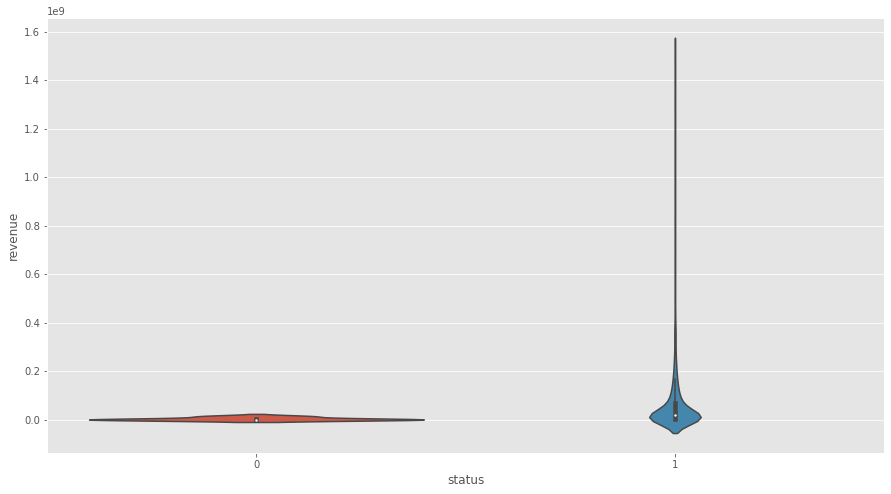

In [83]:
plt.figure(figsize=(15,8))
sns.violinplot(x = 'status', y = 'revenue', data = train)

In [621]:
#out

### Tagline

In [635]:
train, test = import_data()

In [638]:
null('tagline')

Train Null: 597
Test Null: 863


In [639]:
train['tagline']

0       The Laws of Space and Time are About to be Vio...
1       It can take a lifetime to find true love; she'...
2         The road to greatness can take you to the edge.
3                                                     NaN
4                                                     NaN
                              ...                        
2995    It was supposed to be a routine prisoner trans...
2996                                                  NaN
2997                 What's forgotten is not always gone.
2998    For the most cautious man on Earth, life is ab...
2999            They stole his life. He's taking it back.
Name: tagline, Length: 3000, dtype: object

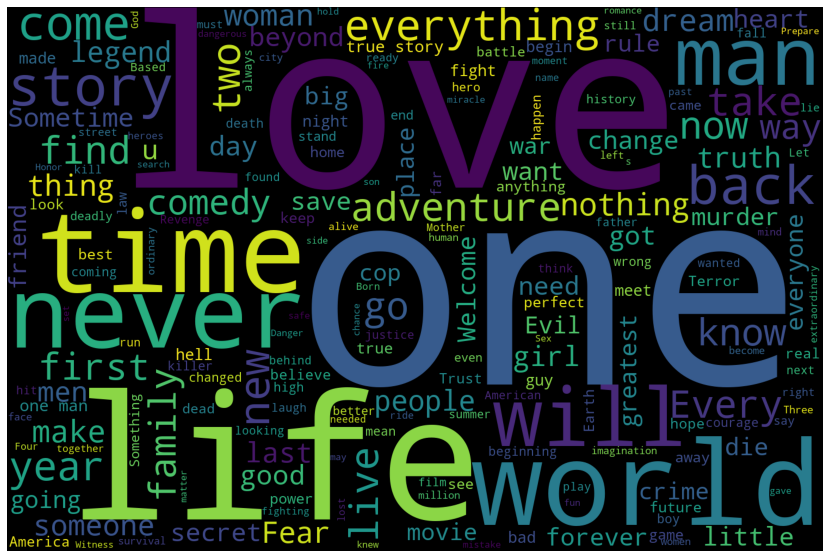

In [98]:
plt.figure(figsize = (15,10))
text = ' '.join(train['tagline'].fillna('').values)
wc = WordCloud(width=1500, height=1000).generate(text)
plt.imshow(wc)
plt.axis("off")
plt.show()

In [100]:
#out

### Keywords

In [4]:
train, test = import_data()

In [5]:
extract_from_str(train, 'Keywords')

In [6]:
train['Keywords'].head(20)

0     [{'id': 4379, 'name': 'time travel'}, {'id': 9...
1     [{'id': 2505, 'name': 'coronation'}, {'id': 42...
2     [{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...
3     [{'id': 10092, 'name': 'mystery'}, {'id': 1054...
4                                                     0
5                                                     0
6                                                     0
7     [{'id': 917, 'name': 'journalism'}, {'id': 163...
8     [{'id': 2041, 'name': 'island'}, {'id': 4418, ...
9     [{'id': 11800, 'name': 'mockumentary'}, {'id':...
10    [{'id': 240, 'name': 'underdog'}, {'id': 276, ...
11    [{'id': 5801, 'name': 'nerd'}, {'id': 6876, 'n...
12    [{'id': 255, 'name': 'male nudity'}, {'id': 29...
13    [{'id': 3605, 'name': 'baseball bat'}, {'id': ...
14    [{'id': 476, 'name': 'self-fulfilling prophecy...
15    [{'id': 379, 'name': 'skinhead'}, {'id': 7492,...
16    [{'id': 1562, 'name': 'hostage'}, {'id': 2250,...
17    [{'id': 5565, 'name': 'biography'}, {'id':

In [121]:
train['len_keywords'] = train['Keywords'].apply(lambda x: len(x) if x != 0 else 0)

<AxesSubplot:ylabel='Frequency'>

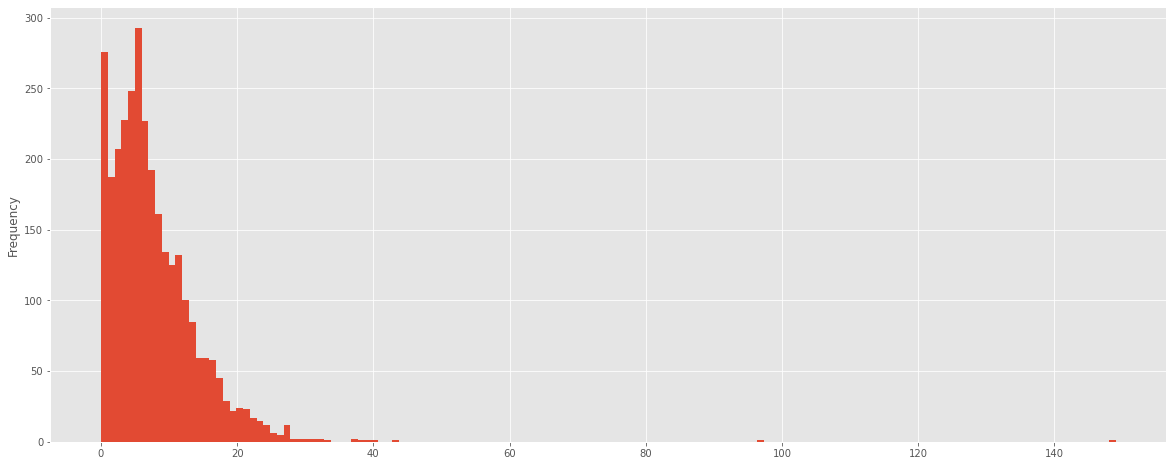

In [128]:
plt.figure(figsize = (20,8))
train['len_keywords'].plot(kind = 'hist', bins = 150)

In [130]:
train.drop('Keywords', axis = 1, inplace = True)

### Cast

In [651]:
train, test = import_data()

In [652]:
extract_from_str(train,'cast')

In [653]:
null('cast')

Train Null: 0
Test Null: 13


In [654]:
train['cast'][0][:3]

[{'cast_id': 4,
  'character': 'Lou',
  'credit_id': '52fe4ee7c3a36847f82afae7',
  'gender': 2,
  'id': 52997,
  'name': 'Rob Corddry',
  'order': 0,
  'profile_path': '/k2zJL0V1nEZuFT08xUdOd3ucfXz.jpg'},
 {'cast_id': 5,
  'character': 'Nick',
  'credit_id': '52fe4ee7c3a36847f82afaeb',
  'gender': 2,
  'id': 64342,
  'name': 'Craig Robinson',
  'order': 1,
  'profile_path': '/tVaRMkJXOEVhYxtnnFuhqW0Rjzz.jpg'},
 {'cast_id': 6,
  'character': 'Jacob',
  'credit_id': '52fe4ee7c3a36847f82afaef',
  'gender': 2,
  'id': 54729,
  'name': 'Clark Duke',
  'order': 2,
  'profile_path': '/oNzK0umwm5Wn0wyEbOy6TVJCSBn.jpg'}]

In [655]:
train['cast_name'] = list(train['cast'].apply(lambda x: [i['name'] for i in x] if x != 0 else []).values)
train['len_cast_name'] = train['cast_name'].apply(lambda x: len(x))
train['cast_gender'] = list(train['cast'].apply(lambda x: [i['gender'] for i in x] if x != 0 else []).values)
#train['len_cast_gender'] = train['cast_gender'].apply(lambda x: len(x))
train['cast_id'] = list(train['cast'].apply(lambda x: [i['id'] for i in x] if x != 0 else []).values)

train[['cast_name','cast_gender']].head()

,cast_name,cast_gender
0,"[Rob Corddry, Craig Robinson, Clark Duke, Adam...","[2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 1, 1, 0, ..."
1,"[Anne Hathaway, Julie Andrews, H√©ctor Elizond...","[1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, ..."
2,"[Miles Teller, J.K. Simmons, Melissa Benoist, ...","[2, 2, 1, 2, 2, 1, 2, 0, 2, 2, 0, 2, 0, 2, 0, ..."
3,"[Vidya Balan, Nawazuddin Siddiqui, Parambrata ...","[1, 2, 0, 0, 0, 2, 0]"
4,"[Kim Kang-woo, Jo Jae-hyeon, Park Si-yeon, Kim...","[2, 2, 2, 2]"


<AxesSubplot:xlabel='len_cast_name', ylabel='Count'>

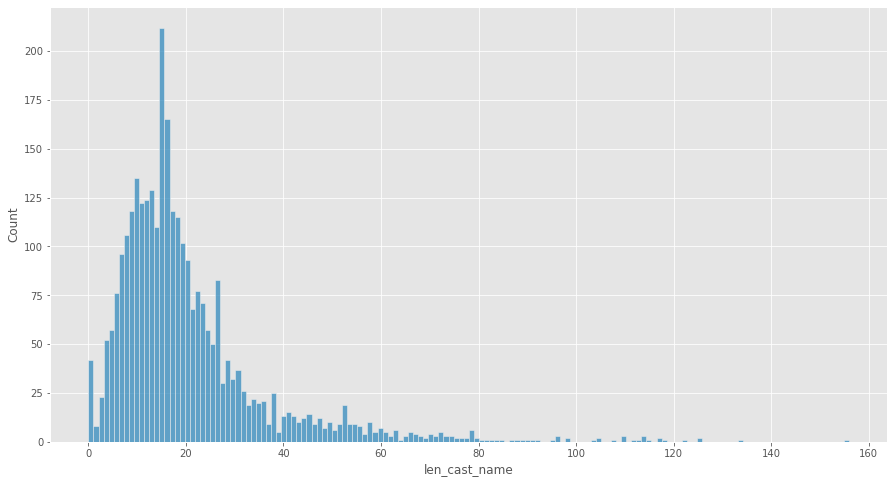

In [657]:
plt.figure(figsize=(15,8))
sns.histplot(data = train['len_cast_name'], bins = 150)

In [658]:
train[train['len_cast_name'] == train['len_cast_name'].max()]['title']

684    Beauty and the Beast
Name: title, dtype: object

In [202]:
# gender:
# 0 - unspecified
# 1 - female
# 2 - male

In [659]:
train['len_gender_unspecified_cast'] = 0
train['len_gender_female_cast'] = 0
train['len_gender_male_cast'] = 0
for i in range(len(train)):
    zero = 0
    one = 0
    two = 0

    for j in range(len(train['cast_gender'][i])):
      if train['cast_gender'][i][j] == 0:
          zero += 1
      elif train['cast_gender'][i][j] ==1:
          one += 1
      else:
          two += 1


    train['len_gender_unspecified_cast'].loc.__setitem__(i,zero)
    train['len_gender_female_cast'].loc.__setitem__(i,one)
    train['len_gender_male_cast'].loc.__setitem__(i,two)

/home/adamz/anaconda3/envs/ML/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [160]:
train[['cast_gender', 'len_cast_gender', 'len_gender_unspecified_cast', 'len_gender_female_cast', 'len_gender_male_cast']]

,cast_gender,len_cast_gender,len_gender_unspecified_cast,len_gender_female_cast,len_gender_male_cast
0,"[2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 1, 1, 0, ...",24,6,8,10
1,"[1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, ...",20,0,10,10
2,"[2, 2, 1, 2, 2, 1, 2, 0, 2, 2, 0, 2, 0, 2, 0, ...",51,31,7,13
3,"[1, 2, 0, 0, 0, 2, 0]",7,4,1,2
4,"[2, 2, 2, 2]",4,0,0,4
...,...,...,...,...,...
2995,"[2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 0]",15,1,3,11
2996,"[0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1]",11,9,1,1
2997,"[1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 0, 1]",15,2,4,9
2998,"[2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, ...",26,1,9,16


<AxesSubplot:xlabel='len_gender_male_cast', ylabel='count'>

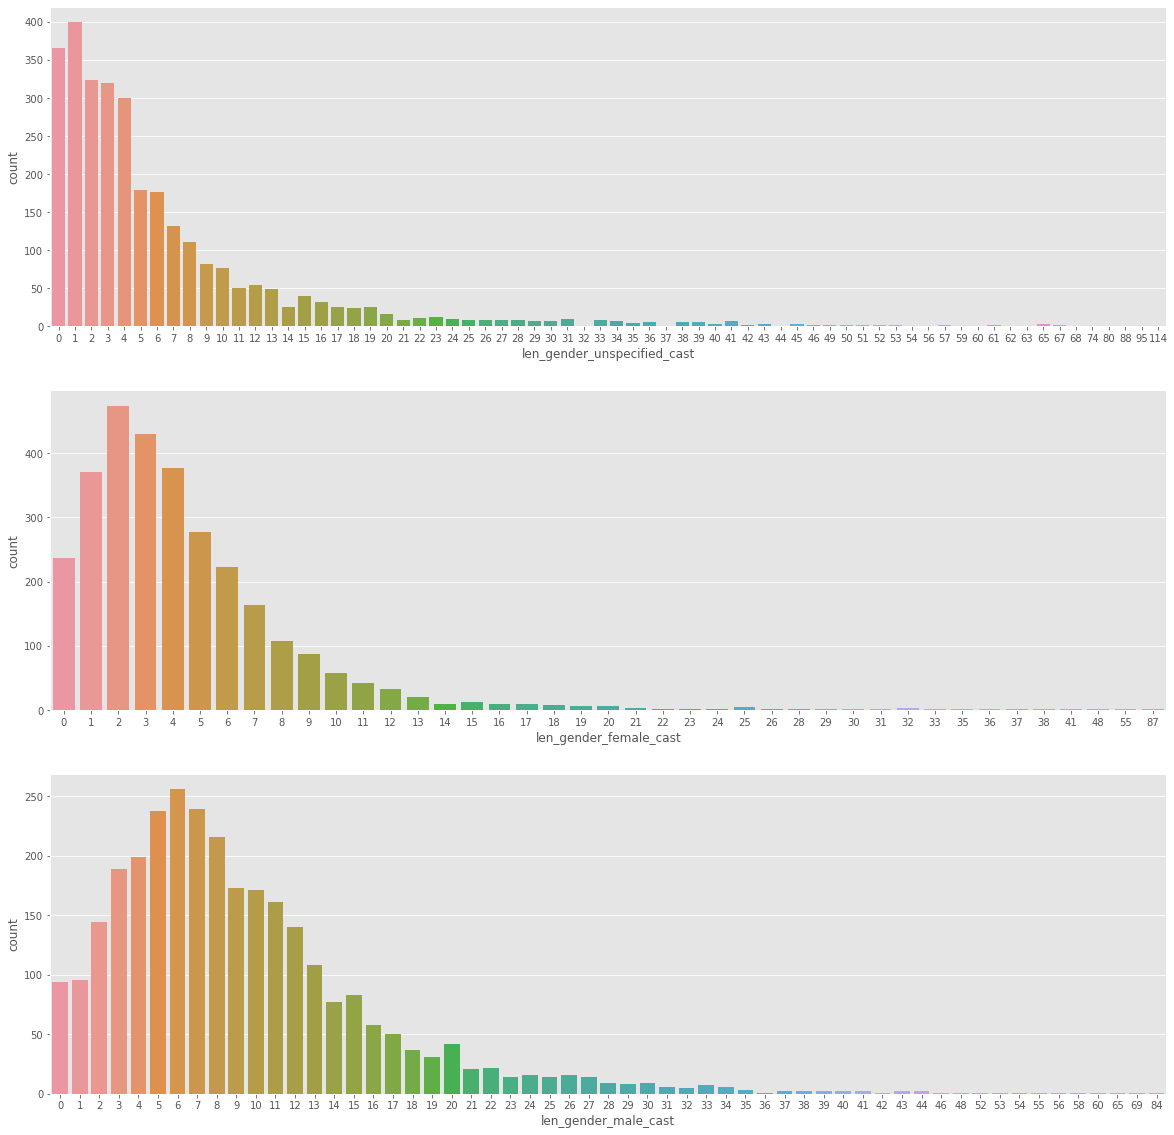

In [161]:
plt.figure(figsize=(20, 20))
plt.subplot(3, 1, 1)
sns.countplot(x = 'len_gender_unspecified_cast', data = train)
plt.subplot(3, 1, 2)
sns.countplot(x = 'len_gender_female_cast', data = train)
plt.subplot(3, 1, 3)
sns.countplot(x = 'len_gender_male_cast', data = train)

In [162]:
cast_name = list(train['cast'].apply(lambda x: [i['name'] for i in x] if x != 0 else []).values)
Counter([i for j in cast_name for i in j]).most_common(20)

[('Samuel L. Jackson', 30),
 ('Robert De Niro', 30),
 ('Morgan Freeman', 27),
 ('J.K. Simmons', 25),
 ('Bruce Willis', 25),
 ('Liam Neeson', 25),
 ('Susan Sarandon', 25),
 ('Bruce McGill', 24),
 ('John Turturro', 24),
 ('Forest Whitaker', 23),
 ('Willem Dafoe', 23),
 ('Bill Murray', 22),
 ('Owen Wilson', 22),
 ('Nicolas Cage', 22),
 ('Sylvester Stallone', 21),
 ('Jason Statham', 21),
 ('Keith David', 21),
 ('John Goodman', 21),
 ('Mel Gibson', 21),
 ('Sigourney Weaver', 21)]

In [167]:
cast_character = list(train['cast'].apply(lambda x: [i['character'] for i in x] if x != 0 else []).values)
Counter([i for j in cast_character for i in j]).most_common(20)

[('', 818),
 ('Himself', 610),
 ('Herself', 155),
 ('Dancer', 144),
 ('Additional Voices (voice)', 100),
 ('Doctor', 77),
 ('Reporter', 70),
 ('Waitress', 69),
 ('Nurse', 65),
 ('Bartender', 55),
 ('Jack', 54),
 ('Debutante', 54),
 ('Security Guard', 50),
 ('Paul', 48),
 ('Frank', 44),
 ('Charlie', 41),
 ('Waiter', 41),
 ('Cop', 40),
 ('Priest', 40),
 ('Student', 39)]

In [164]:
def most_common_cast_pie(df, type):
    cast_data = list(df['cast'].apply(lambda x: [i[type] for i in x] if x != 0 else []).values)
    cast_data_counter = Counter([i for j in cast_data for i in j]).most_common(20)

    label, value = zip(*cast_data_counter)

    plt.figure(figsize=(13,13))
    plt.pie(value, labels=label, autopct='%.2f%%') 
    plt.title('Most common {} in cast.'.format(type))
    plt.show()

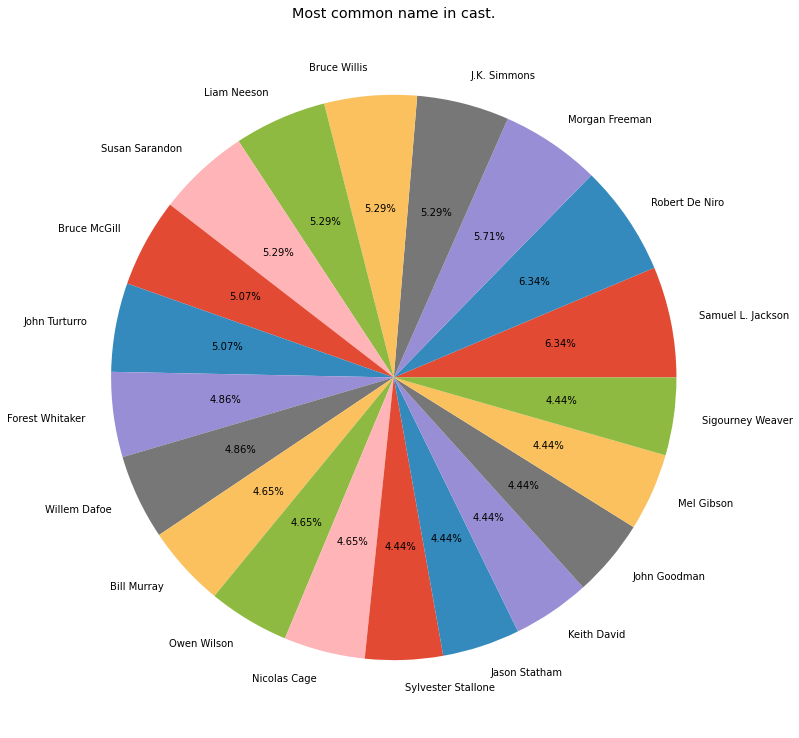

In [165]:
most_common_cast_pie(train, 'name')

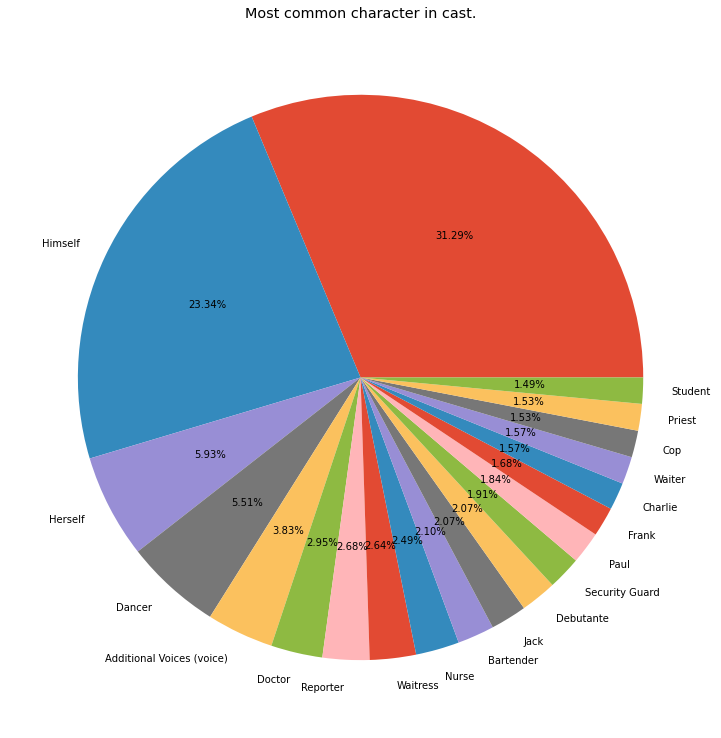

In [168]:
most_common_cast_pie(train, 'character')

#### Def

In [ ]:
#pomyślec czy top osób z cast nie mają wpływu na przychód

In [646]:
def cast(df):
    extract_from_str(df,'cast')
    df['cast_name'] = list(df['cast'].apply(lambda x: [i['name'] for i in x] if x != 0 else []).values)
    df['len_cast_name'] = df['cast_name'].apply(lambda x: len(x))
    df['cast_gender'] = list(df['cast'].apply(lambda x: [i['gender'] for i in x] if x != 0 else []).values)
    #df['cast_id'] = list(df['cast'].apply(lambda x: [i['id'] for i in x] if x != 0 else []).values)

    df['len_gender_unspecified_cast'] = 0
    df['len_gender_female_cast'] = 0
    df['len_gender_male_cast'] = 0
    for i in range(len(df)):
        zero = 0
        one = 0
        two = 0

        for j in range(len(df['cast_gender'][i])):
            if df['cast_gender'][i][j] == 0:
                zero += 1
            elif df['cast_gender'][i][j] ==1:
                one += 1
            else:
                two += 1

        df['len_gender_unspecified_cast'].loc.__setitem__(i,zero)
        df['len_gender_female_cast'].loc.__setitem__(i,one)
        df['len_gender_male_cast'].loc.__setitem__(i,two)


    df.drop(['cast', 'cast_name', 'cast_gender'], axis = 1, inplace = True)

In [647]:
cast(train)
cast(test)

/home/adamz/anaconda3/envs/ML/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


### Crew

In [667]:
train, test = import_data()

In [668]:
null('crew')

Train Null: 16
Test Null: 22


In [669]:
extract_from_str(train,'crew')

In [670]:
train['crew'][0][:3]

[{'credit_id': '59ac067c92514107af02c8c8',
  'department': 'Directing',
  'gender': 0,
  'id': 1449071,
  'job': 'First Assistant Director',
  'name': 'Kelly Cantley',
  'profile_path': None},
 {'credit_id': '52fe4ee7c3a36847f82afad7',
  'department': 'Directing',
  'gender': 2,
  'id': 3227,
  'job': 'Director',
  'name': 'Steve Pink',
  'profile_path': '/myHOgo8mQSCiCAZNGMRdHVr03jr.jpg'},
 {'credit_id': '5524ed25c3a3687ded000d88',
  'department': 'Writing',
  'gender': 2,
  'id': 347335,
  'job': 'Writer',
  'name': 'Josh Heald',
  'profile_path': '/pwXJIenrDMrG7t3zNfLvr8w1RGU.jpg'}]

In [673]:
train['len_crew'] = train['crew'].apply(lambda x: len(x) if x !=0 else 0)
train['crew_name'] = list(train['crew'].apply(lambda x: [i['name'] for i in x] if x != 0 else []).values)
train['len_crew_name'] = train['crew_name'].apply(lambda x: len(x))

train['crew_gender'] = list(train['crew'].apply(lambda x: [i['gender'] for i in x] if x != 0 else []).values)

train['crew_job'] = list(train['crew'].apply(lambda x: [i['job'] for i in x] if x != 0 else []).values)
train['len_crew_job'] = train['crew'].apply(lambda x: len(set([i['job'] for i in x])) if x != 0 else 0)

train['crew_department'] = list(train['crew'].apply(lambda x: [i['department'] for i in x] if x != 0 else []).values)
train['len_crew_department'] = train['crew'].apply(lambda x: len(set([i['department'] for i in x])) if x != 0 else 0)

train[['crew_name','crew_gender', 'crew_job', 'crew_department']].head()

,crew_name,crew_gender,crew_job,crew_department
0,"[Kelly Cantley, Steve Pink, Josh Heald, Josh H...","[0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0, ...","[First Assistant Director, Director, Writer, C...","[Directing, Directing, Writing, Writing, Produ..."
1,"[Garry Marshall, Charles Minsky, John Debney, ...","[2, 2, 2, 1, 0, 2, 1, 1, 1]","[Director, Director of Photography, Original M...","[Directing, Camera, Sound, Production, Editing..."
2,"[Terri Taylor, Richard Henderson, Jeffrey Stot...","[1, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, ...","[Casting, Music Editor, Executive In Charge Of...","[Production, Sound, Production, Costume & Make..."
3,"[Sujoy Ghosh, Sujoy Ghosh, Sujoy Ghosh]","[0, 0, 0]","[Director, Producer, Writer]","[Directing, Production, Writing]"
4,"[Jong-seok Yoon, Jong-seok Yoon]","[0, 0]","[Director, Writer]","[Directing, Writing]"


<AxesSubplot:xlabel='len_crew_name', ylabel='Count'>

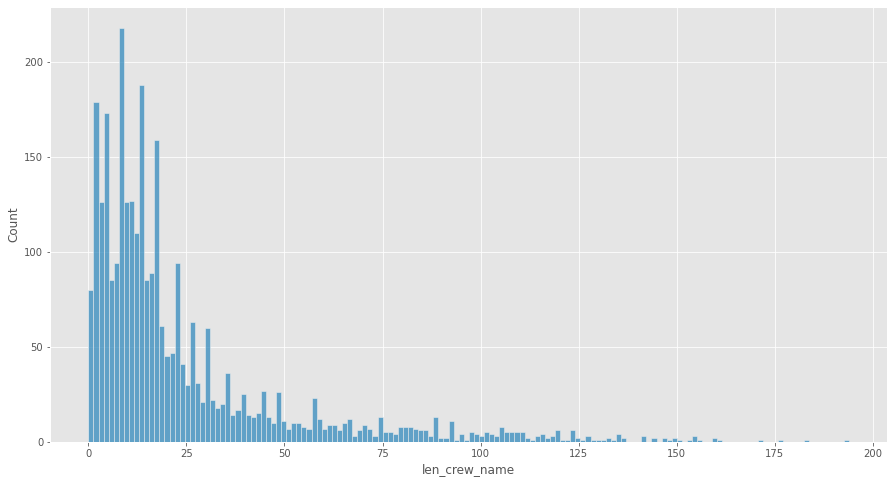

In [674]:
plt.figure(figsize=(15,8))
sns.histplot(data = train['len_crew_name'], bins = 150)

In [675]:
train['len_gender_unspecified_crew'] = 0
train['len_gender_female_crew'] = 0
train['len_gender_male_crew'] = 0
for i in range(len(train)):
    zero = 0
    one = 0
    two = 0

    for j in range(len(train['crew_gender'][i])):
      if train['crew_gender'][i][j] == 0:
          zero += 1
      elif train['crew_gender'][i][j] ==1:
          one += 1
      else:
          two += 1

    train['len_gender_unspecified_crew'].loc.__setitem__(i,zero)
    train['len_gender_female_crew'].loc.__setitem__(i,one)
    train['len_gender_male_crew'].loc.__setitem__(i,two)


/home/adamz/anaconda3/envs/ML/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [171]:
train[['crew_gender', 'len_gender_unspecified_crew', 'len_gender_female_crew', 'len_gender_male_crew']]

,crew_gender,len_crew_gender,len_crew_name,len_gender_unspecified_crew,len_gender_female_crew,len_gender_male_crew
0,"[0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0, ...",72,72,59,0,13
1,"[2, 2, 2, 1, 0, 2, 1, 1, 1]",9,9,1,4,4
2,"[1, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, ...",64,64,49,4,11
3,"[0, 0, 0]",3,3,3,0,0
4,"[0, 0]",2,2,2,0,0
...,...,...,...,...,...,...
2995,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, ...",17,17,2,1,14
2996,"[0, 1, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2]",15,15,10,1,4
2997,"[2, 2, 1, 2, 2, 1, 2, 2, 0, 0]",10,10,2,2,6
2998,"[2, 0, 2, 2, 2, 1, 0, 1, 2, 2, 0, 2, 0, 2, 2, ...",89,89,61,10,18


<AxesSubplot:xlabel='len_gender_male_crew', ylabel='count'>

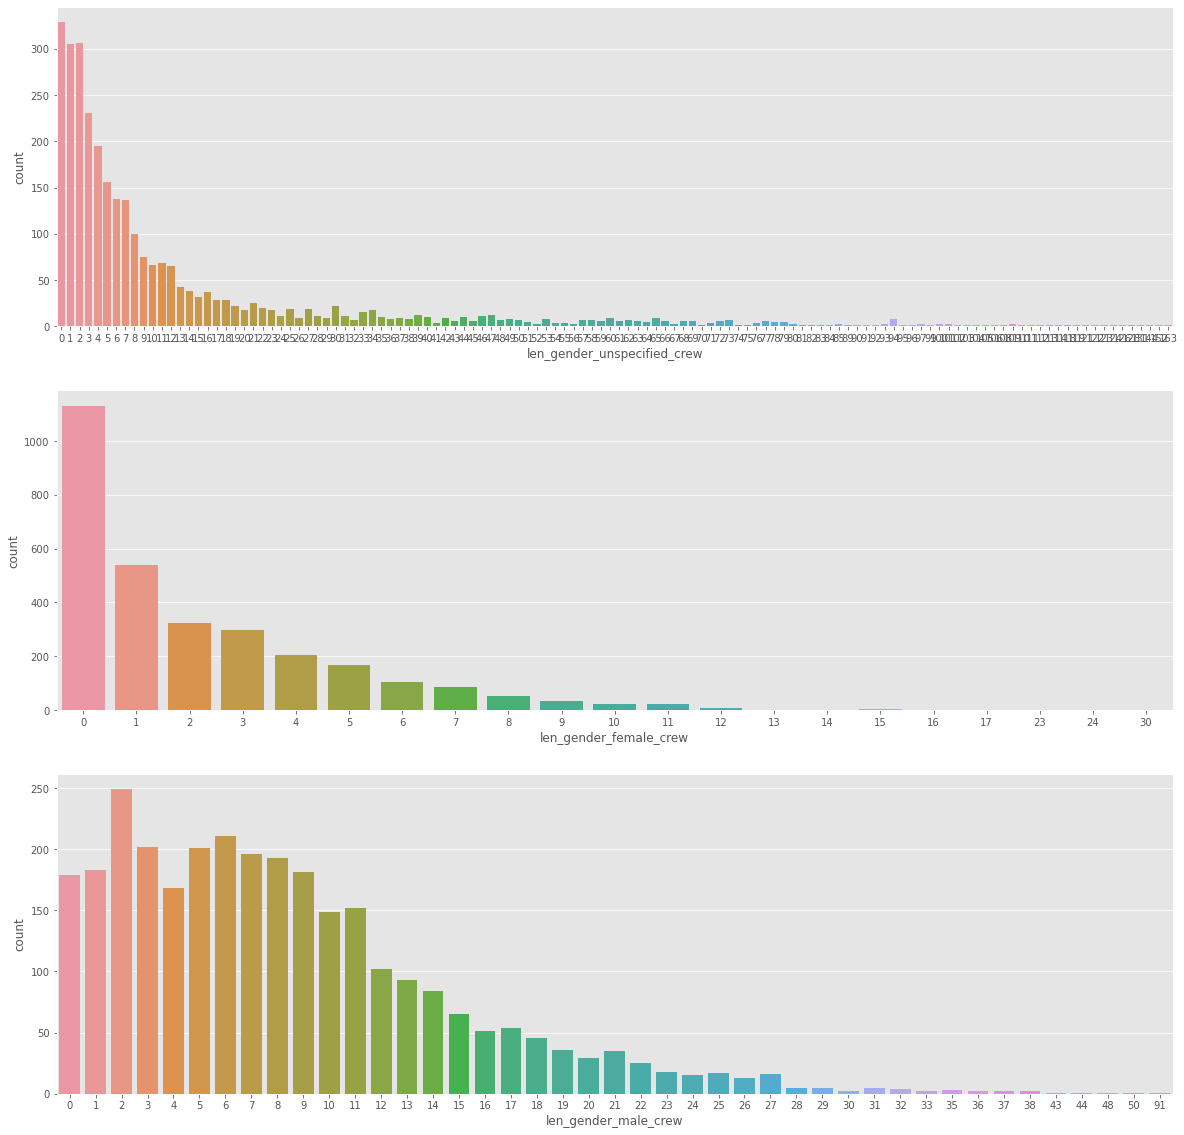

In [42]:
plt.figure(figsize=(20, 20))
plt.subplot(3, 1, 1)
sns.countplot(x = 'len_gender_unspecified_crew', data = train)
plt.subplot(3, 1, 2)
sns.countplot(x = 'len_gender_female_crew', data = train)
plt.subplot(3, 1, 3)
sns.countplot(x = 'len_gender_male_crew', data = train)

In [145]:
def most_common_crew_pie(df, type):
    crew_data = list(df['crew'].apply(lambda x: [i[type] for i in x] if x != 0 else []).values)
    crew_data_counter = Counter([i for j in crew_data for i in j]).most_common(20)

    label, value = zip(*crew_data_counter)

    plt.figure(figsize=(13,13))
    plt.pie(value, labels=label, autopct='%.2f%%') 
    plt.title('Most common {} in crew.'.format(type))
    plt.show()

In [136]:
crew_name = list(train['crew'].apply(lambda x: [i['name'] for i in x] if x != 0 else []).values)
crew_name_counter = Counter([i for j in crew_name for i in j]).most_common(20)

crew_job = list(train['crew'].apply(lambda x: [i['job'] for i in x] if x != 0 else []).values)
crew_job_counter = Counter([i for j in crew_job for i in j]).most_common(20)

crew_department = list(train['crew'].apply(lambda x: [i['department'] for i in x] if x != 0 else []).values)
crew_department_counter = Counter([i for j in crew_department for i in j]).most_common()

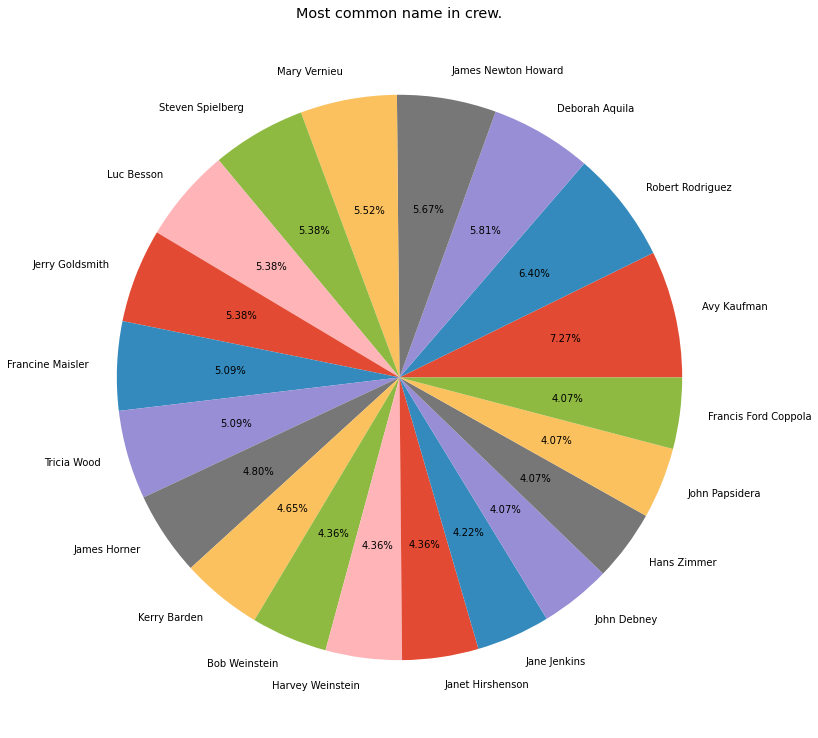

In [148]:
most_common_crew_pie(train, 'name')

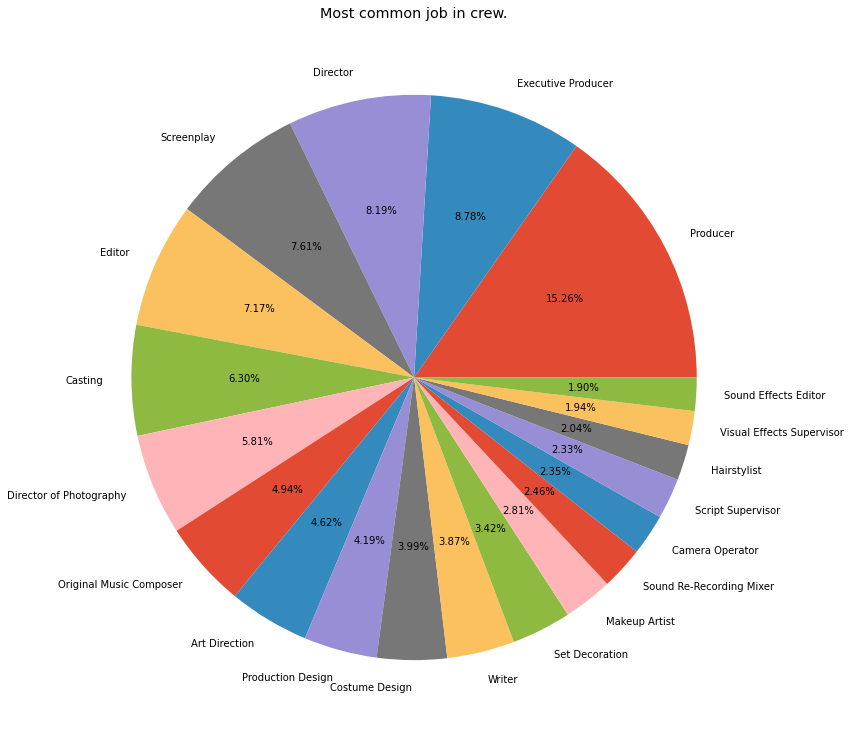

In [149]:
most_common_crew_pie(train, 'job')

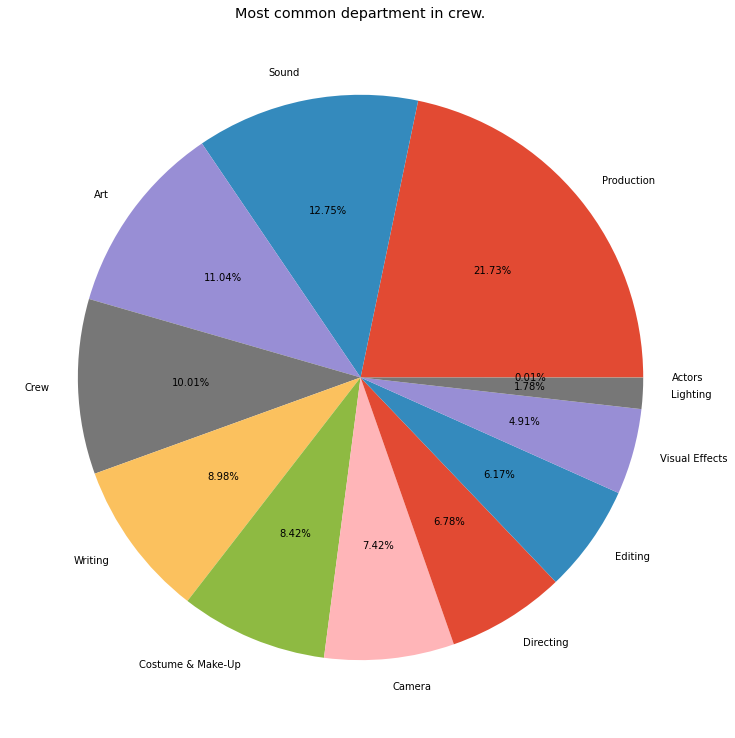

In [150]:
most_common_crew_pie(train, 'department')

#### Def

In [660]:
def crew(df):
    extract_from_str(df,'crew')
    df['len_crew'] = df['crew'].apply(lambda x: len(x) if x !=0 else 0)
    #train['crew_name'] = list(train['crew'].apply(lambda x: [i['name'] for i in x] if x != 0 else []).values)
    #train['len_crew_name'] = train['crew_name'].apply(lambda x: len(x))

    df['crew_gender'] = list(df['crew'].apply(lambda x: [i['gender'] for i in x] if x != 0 else []).values)

    df['crew_job'] = list(df['crew'].apply(lambda x: [i['job'] for i in x] if x != 0 else []).values)
    df['len_crew_job'] = df['crew'].apply(lambda x: len(set([i['job'] for i in x])) if x != 0 else 0)

    df['crew_department'] = list(df['crew'].apply(lambda x: [i['department'] for i in x] if x != 0 else []).values)
    df['len_crew_department'] = df['crew'].apply(lambda x: len(set([i['department'] for i in x])) if x != 0 else 0)

        
    df['len_gender_unspecified_crew'] = 0
    df['len_gender_female_crew'] = 0
    df['len_gender_male_crew'] = 0
    for i in range(len(df)):
        zero = 0
        one = 0
        two = 0

        for j in range(len(df['crew_gender'][i])):
            if df['crew_gender'][i][j] == 0:
                zero += 1
            elif df['crew_gender'][i][j] ==1:
                one += 1
            else:
                two += 1


        df['len_gender_unspecified_crew'].loc.__setitem__(i,zero)
        df['len_gender_female_crew'].loc.__setitem__(i,one)
        df['len_gender_male_crew'].loc.__setitem__(i,two)


    df.drop(['crew', 'crew_gender', 'crew_job', 'crew_department'], axis = 1, inplace = True)


In [662]:
crew(train)
crew(test)

/home/adamz/anaconda3/envs/ML/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


### All in one

In [27]:
train, test = import_data()

In [24]:
def import_data():
    train = pd.read_csv('train.csv')
    test = pd.read_csv('test.csv')
    return train, test
def extract_from_str(df, column):
    df[column] = df[column].apply(lambda x: 0 if pd.isna(x) else ast.literal_eval(x))
def belong_to_collection(df):

    def if_belongs_with_id(df):  
        df['if_collection'] = df['belongs_to_collection'].map(lambda x: 0 if x == 0 else 1)
        df['id_collection'] = df['belongs_to_collection'].apply(lambda x: 0 if x == 0 else x[0]['id'])

    def count_collection(df):
        max = df['id_collection'].value_counts().max()
        count_df = df['id_collection'].value_counts(sort=False).apply(lambda x: 0 if x == max else x)
        count_dic = count_df.to_dict()
        df['quantity_collection'] = df['id_collection'].map(count_dic)
        df.drop(['belongs_to_collection','id_collection'], axis=1, inplace = True)

    extract_from_str(df, 'belongs_to_collection')
    if_belongs_with_id(df)
    count_collection(df)
def original_language(df):
    def if_lang_eng(df):
        df['language_eng'] = df['original_language'].map(lambda x: 1 if x == 'en' else 0)

    def map_original_lang(df):
        unique_language = df['original_language'].unique()
        nu_lan = np.arange(df['original_language'].nunique())
        dict_language = dict(zip(unique_language, nu_lan))

        df['original_language'] = df['original_language'].map(dict_language)

    if_lang_eng(df)
    map_original_lang(df)
def title(df):

    def diff_title(df):
        df['diff_title'] = 0
        for i in range(len(df)):
            if df['title'][i] == df['original_title'][i]:
                df['diff_title'][i] = 1

    diff_title(df)
    df.drop(['title','original_title'], axis = 1, inplace = True)
def genres(df):
    extract_from_str(df, 'genres')
    df['list_genres'] = list(df['genres'].apply(lambda x: [i['name'] for i in x] if x != 0 else []).values)
    df['count_genres'] = df['list_genres'].apply(lambda x: len(x))
    df.drop(['genres', 'list_genres'], axis = 1, inplace = True)
def homepage(df):
    df['homepage'].fillna(0, axis = 0, inplace=True)
    df['homepage'] = df['homepage'].apply(lambda x: 0 if x == 0 else 1)
def production_companies(df):
    extract_from_str(df, 'production_companies')
    
    df['list_production_companies'] = list(df['production_companies'].apply(lambda x: [i['name'] for i in x] if x != 0 else []).values)
    df['len_production_companies'] = df['list_production_companies'].apply(len)
    df['id_production_comapnies'] = list(df['production_companies'].apply(lambda x: [i['id'] for i in x] if x != 0 else []).values)
    df['main_production_companies_id'] = df['id_production_comapnies'].apply(lambda x: x[0] if x != [] else 0)

    df.drop(['list_production_companies', 'production_companies', 'id_production_comapnies'], axis = 1, inplace = True)
def production_countries(df):
    extract_from_str(df, 'production_countries')
    df['list_production_countries'] = list(df['production_countries'].apply(lambda x: [i['name'] for i in x] if x != 0 else []).values)
    df['len_production_countries'] = df['list_production_countries'].apply(len)
    df['if_in_USA'] = df['list_production_countries'].apply(lambda x: 1 if 'United States of America' in x else 0)
    df.drop(['list_production_countries', 'production_countries'], axis = 1, inplace = True)
def release_date(df):

    def add_full_year(x):
        if x > 17:
            x += 1900
        else:
            x += 2000
        return x

    if len(df) == 4398:
        id = df[df['release_date'].isnull() == True].index.values
        df.__getitem__('release_date').loc.__setitem__(id, '3/20/01') #source - IMDB

    df['day'] = df['release_date'].apply(lambda x: int(x.split('/')[1]))
    df['month'] = df['release_date'].apply(lambda x: int(x.split('/')[0]))
    df['year'] = df['release_date'].apply(lambda x: int(x.split('/')[2]))

    df['year'] = df['year'].apply(lambda x: add_full_year(x))
    #df['release_date'] = pd.to_datetime(df[['year','month','day']])
    df.drop(['release_date'], axis = 1, inplace = True)
def runtime(df):
    mean_rt = df['runtime'].mean()
    df['runtime'].fillna(mean_rt, inplace = True)
    df['runtime'] = df['runtime'].apply(lambda x: mean_rt if x == 0 else x)
def spoken_languages(df):
    extract_from_str(df, 'spoken_languages')
    df['list_spoken_languages'] = list(df['spoken_languages'].apply(lambda x: [i['iso_639_1'] for i in x] if x != 0 else []).values)
    df['len_spoken_lan'] = df['list_spoken_languages'].apply(lambda x: len(x))
    df['eng_spoken_lan'] = df['list_spoken_languages'].apply(lambda x: 1 if 'en' in x else 0)

    df.drop(['spoken_languages', 'list_spoken_languages'], axis = 1, inplace = True)
def cast(df):

    extract_from_str(df,'cast')
    df['cast_name'] = list(df['cast'].apply(lambda x: [i['name'] for i in x] if x != 0 else []).values)
    df['len_cast_name'] = df['cast_name'].apply(lambda x: len(x))
    df['cast_gender'] = list(df['cast'].apply(lambda x: [i['gender'] for i in x] if x != 0 else []).values)
    #df['cast_id'] = list(df['cast'].apply(lambda x: [i['id'] for i in x] if x != 0 else []).values)

    df['len_gender_unspecified_cast'] = 0
    df['len_gender_female_cast'] = 0
    df['len_gender_male_cast'] = 0
    for i in range(len(df)):
        zero = 0
        one = 0
        two = 0

        for j in range(len(df['cast_gender'][i])):
            if df['cast_gender'][i][j] == 0:
                zero += 1
            elif df['cast_gender'][i][j] ==1:
                one += 1
            else:
                two += 1

        df['len_gender_unspecified_cast'].loc.__setitem__(i,zero)
        df['len_gender_female_cast'].loc.__setitem__(i,one)
        df['len_gender_male_cast'].loc.__setitem__(i,two)


    df.drop(['cast', 'cast_name', 'cast_gender'], axis = 1, inplace = True)
def crew(df):
    extract_from_str(df,'crew')
    df['len_crew'] = df['crew'].apply(lambda x: len(x) if x !=0 else 0)
    #train['crew_name'] = list(train['crew'].apply(lambda x: [i['name'] for i in x] if x != 0 else []).values)
    #train['len_crew_name'] = train['crew_name'].apply(lambda x: len(x))

    df['crew_gender'] = list(df['crew'].apply(lambda x: [i['gender'] for i in x] if x != 0 else []).values)

    df['crew_job'] = list(df['crew'].apply(lambda x: [i['job'] for i in x] if x != 0 else []).values)
    df['len_crew_job'] = df['crew'].apply(lambda x: len(set([i['job'] for i in x])) if x != 0 else 0)

    df['crew_department'] = list(df['crew'].apply(lambda x: [i['department'] for i in x] if x != 0 else []).values)
    df['len_crew_department'] = df['crew'].apply(lambda x: len(set([i['department'] for i in x])) if x != 0 else 0)

        
    df['len_gender_unspecified_crew'] = 0
    df['len_gender_female_crew'] = 0
    df['len_gender_male_crew'] = 0
    for i in range(len(df)):
        zero = 0
        one = 0
        two = 0

        for j in range(len(df['crew_gender'][i])):
            if df['crew_gender'][i][j] == 0:
                zero += 1
            elif df['crew_gender'][i][j] ==1:
                one += 1
            else:
                two += 1


        df['len_gender_unspecified_crew'].loc.__setitem__(i,zero)
        df['len_gender_female_crew'].loc.__setitem__(i,one)
        df['len_gender_male_crew'].loc.__setitem__(i,two)


    df.drop(['crew', 'crew_gender', 'crew_job', 'crew_department'], axis = 1, inplace = True)



In [25]:
def feature_engineering(df):
    belong_to_collection(df)
    original_language(df)
    title(df)
    genres(df)
    homepage(df)
    production_companies(df)
    production_countries(df)
    release_date(df)
    runtime(df)
    spoken_languages(df)
    cast(df)
    crew(df)
    
    df.drop(['imdb_id', 'overview','poster_path', 'status', 'tagline', 'Keywords'], axis = 1, inplace = True)

In [28]:
feature_engineering(train)
feature_engineering(test)

<ipython-input-24-15e2da7cd1af>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff_title'][i] = 1
/home/adamz/anaconda3/envs/ML/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [9]:
# Overview - pomyślec czy może coś z tym jeszcze zrobić
# Cast, crew - pomyśleć czy top cast/crew name wpływa na revenue

### Model